In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Исследование данных

## Скачивание и простейшая предобработка данных

In [2]:
data_df = pd.read_csv('./problem_train.csv', sep=',', index_col='id')
labels_df = pd.read_csv('./problem_labels.csv', index_col='id')

C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2957246226.py:1: DtypeWarning: Columns (329,331,333,336,338,344,345,346,348,354,356,357,358,361,362,364,367,372,377,380,383,385,387,390,399,406,408,409,413,416,418,419,431,433,437,438,442,448,449,450,453,457,464,473,478,479,481,483,485,486,489,492,495,496,497,499,500,503,507,508,510,511,514,515,517,519,520,521,522,523,526,527,530,534,537,538,539,541,542,544,547,548,549,550,551,557,558,560,564,569,572,573,576,577,579,583,596,597,600,601,602,604,605,608,609,613,619,620,625,627,628,629,631,632,636,641,642,646,647,648,655,661,662,665,675,676,679,682,685,687,689,690,691,698,701,702,703,706,712,713,719,720,721,733,735,737,738,742,746,747,748,749,752,754,755,760,768,770,781,782,789,797,807,812,814,817,818,822,823,824,825,832,840,844,850,853,857,858,867,868,873,874,876,877,879,880,881,883,886,890,893,897,899,900,901,902,904,905,908,909,910,912,913,914,915,916,922,923,931,933,935,937,939,942,943,946,951,955,964,965,968,969,970,973,974,977,980,98

### Посмотрим на пример данных

In [3]:
print(data_df.shape)
data_df.head(5)

(8000, 1378)


release  n_0000  n_0001    n_0002  n_0003  n_0004    n_0005  n_0006  \
id                                                                          
11193       a     NaN     NaN  0.025449     NaN     NaN  0.368421     NaN   
11382       a     NaN     NaN  0.031297     NaN     NaN  0.315789     NaN   
16531       a     NaN     NaN  0.024475     NaN     NaN  0.342105     NaN   
1896        a     NaN     NaN  0.041694     NaN     NaN  0.447368     NaN   
18262       c     NaN     NaN  0.038120     NaN     NaN  0.315789     NaN   

       n_0007  n_0008  ...  c_1368  c_1369  c_1370  c_1371  c_1372  c_1373  \
id                     ...                                                   
11193     NaN     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   
11382     NaN     NaN  ...     NaN     NaN       a     NaN       a     NaN   
16531     NaN     NaN  ...     NaN     NaN       a     NaN       a     NaN   
1896      NaN     NaN  ...     NaN     NaN     NaN     NaN       a     NaN   
18262     NaN     NaN  ...     NaN     NaN       b     NaN       a     NaN   

       c_1374  c_1375  c_1376  c_1377  
id                                     
11193       q     NaN     NaN     NaN  
11382     NaN     NaN     NaN     NaN  
16531       b     NaN     NaN     NaN  
1896      NaN     NaN     NaN     NaN  
18262       a     NaN     NaN     NaN  

[5 rows x 1378 columns]

In [4]:
print(labels_df.shape)
labels_df.head(5)

(8000, 14)


service_a  service_b  service_c  service_d  service_e  service_f  \
id                                                                        
11193          1          1          0          0          0          0   
11382          0          0          0          0          0          0   
16531          0          0          0          0          0          0   
1896           0          0          0          1          0          0   
18262          0          0          0          1          1          0   

       service_g  service_h  service_i  service_j  service_k  service_l  \
id                                                                        
11193          0          0          0          1          1          0   
11382          0          0          0          1          1          0   
16531          0          0          0          1          1          0   
1896           0          0          0          1          0          1   
18262          0          0          0          0          1          1   

       service_m  service_n  
id                           
11193          0          0  
11382          0          0  
16531          0          0  
1896           0          0  
18262          1          0

### Приведем данные к наиболее подходящему типу

In [5]:
data_df = data_df.convert_dtypes()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 11193 to 3997
Columns: 1378 entries, release to c_1377
dtypes: Float64(105), Int64(248), string(1025)
memory usage: 86.9 MB


In [6]:
labels_df = labels_df.convert_dtypes()
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 11193 to 3997
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   service_a  8000 non-null   Int64
 1   service_b  8000 non-null   Int64
 2   service_c  8000 non-null   Int64
 3   service_d  8000 non-null   Int64
 4   service_e  8000 non-null   Int64
 5   service_f  8000 non-null   Int64
 6   service_g  8000 non-null   Int64
 7   service_h  8000 non-null   Int64
 8   service_i  8000 non-null   Int64
 9   service_j  8000 non-null   Int64
 10  service_k  8000 non-null   Int64
 11  service_l  8000 non-null   Int64
 12  service_m  8000 non-null   Int64
 13  service_n  8000 non-null   Int64
dtypes: Int64(14)
memory usage: 1.0 MB


В итоге мы имеем 1025 категориальных признаков, 105 числовых и 248 с типом int64. Последние могут быть как и обычными числовыми (Например, количество полных лет), так и порядковыми, что мы позднее проверим.

(Кстати, порядковых номеров 1 + (1377-0+1) = 1379, а колонок 1378 => одна потерялась. Нам не принципиально как колонки называются, но стоит держать в голове что такой нюанс есть.)

Получим массивы колонок каждого типа

In [7]:
cat_cols = data_df.select_dtypes(include=['string']).columns.tolist()
num_cols = data_df.select_dtypes(include=['Float64']).columns.tolist()
int_cols = data_df.select_dtypes(include=['Int64']).columns.tolist()

len(num_cols), len(int_cols), len(cat_cols)


(105, 248, 1025)

## Обзор пропущенных значений

Заметим, что в данных очень много пропусков, посмотрим их общую долю, долю для каждого типа признаков -- для всех данных и в среднем по строке.

In [8]:
def nan_ratio(df):
    count = df.shape[0]*df.shape[1]
    return df.isna().values.sum() / count

print('Общая доля пропущенных значений: ', nan_ratio(data_df))
print('Доля пропущенных значений для числовых признаков: ', nan_ratio(data_df[num_cols]))
print('Доля пропущенных значений для Int64 признаков: ', nan_ratio(data_df[int_cols]))
print('Доля пропущенных значений для категориальных признаков: ', nan_ratio(data_df[cat_cols]))

Общая доля пропущенных значений:  0.827187953555878
Доля пропущенных значений для числовых признаков:  0.8138428571428571
Доля пропущенных значений для Int64 признаков:  0.8800428427419354
Доля пропущенных значений для категориальных признаков:  0.8157667073170731


Заметим, что в среднем для колонок int почти в 2 раза меньше заполненных значений, чем для остальных.

Построим гистограммы относительного количества ЗАПОЛНЕННЫХ значений для каждых строк + подстрок только числовых, int и категориальных признаков

In [9]:
data_notna_count = data_df.apply(lambda x: x.count(), axis=1)
data_num_notna_count = data_df[num_cols].apply(lambda x: x.count(), axis=1)
data_int_notna_count = data_df[int_cols].apply(lambda x: x.count(), axis=1)
data_cat_notna_count = data_df[cat_cols].apply(lambda x: x.count(), axis=1)

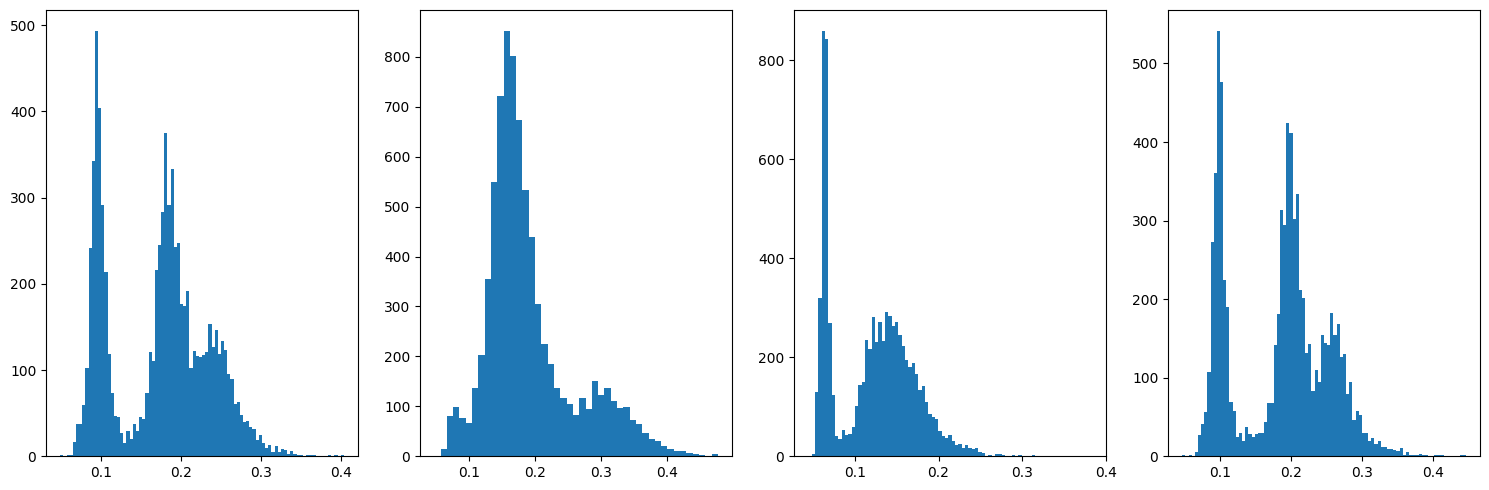

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), tight_layout=True)

axs[0].hist(data_notna_count/data_df.shape[1], bins = 90)
axs[1].hist(data_num_notna_count/data_df[num_cols].shape[1], bins = 45)
axs[2].hist(data_int_notna_count/data_df[int_cols].shape[1], bins = 85)
axs[3].hist(data_cat_notna_count/data_df[cat_cols].shape[1], bins = 90);

Похоже на несколько объединенных выборок из генеральных совокупностей нескольких нормальных распределений.

Посмотрим на такие же гистограммы, но для колонок: относительное количество заполненных значений для каждой колонки (для всех колонок, для числовых, для int и для категорильных отдельно)

In [11]:
data_col_notna_count = data_df.apply(lambda x: x.count(), axis=0)
data_col_num_notna_count = data_df[num_cols].apply(lambda x: x.count(), axis=0)
data_col_int_notna_count = data_df[int_cols].apply(lambda x: x.count(), axis=0)
data_col_cat_notna_count = data_df[cat_cols].apply(lambda x: x.count(), axis=0)

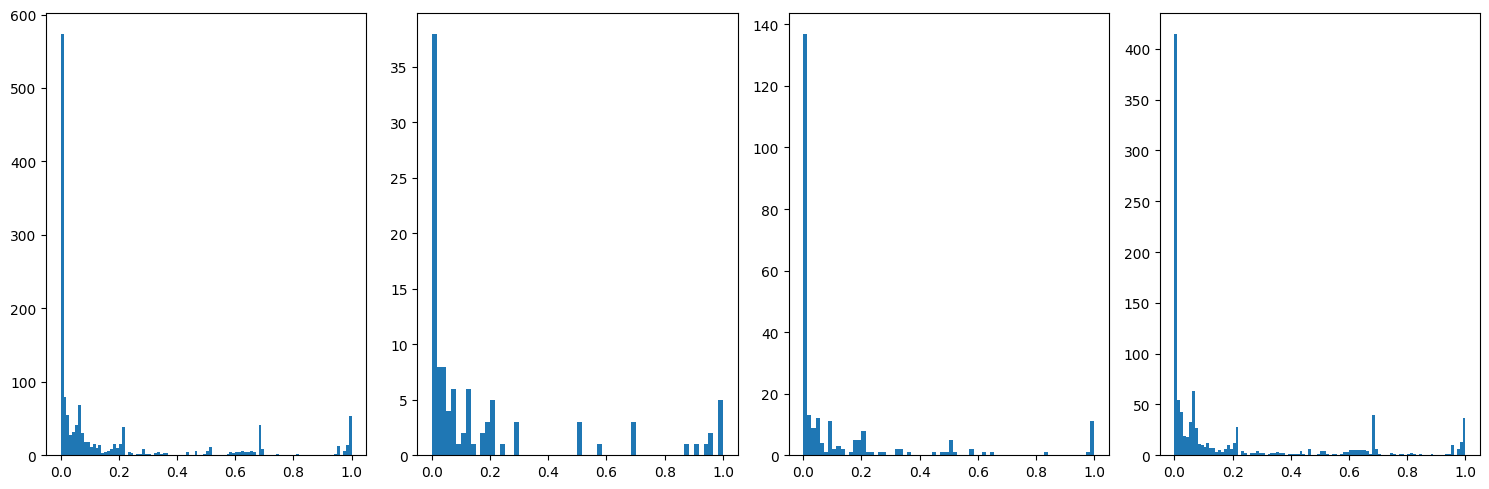

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), tight_layout=True)

axs[0].hist(data_col_notna_count/data_df.shape[0], bins=100)
axs[1].hist(data_col_num_notna_count/data_df[num_cols].shape[0], bins=60)
axs[2].hist(data_col_int_notna_count/data_df[int_cols].shape[0], bins=70)
axs[3].hist(data_col_cat_notna_count/data_df[cat_cols].shape[0], bins=100);

Гораздо менее информативно, конечно, но видно, что присутствуют как и колонки практически не заполненые, так и заполненные полностью. Это может быть полезно для заполнения пустых значений.

## Обзор данных

### Float64 колонки 

Время посмотреть на данные. Во-первых, колонки Float64: 105 колонок, конечно, много, но посмотреть их распределения может быть полезным.

Способ выбора мелкости разбиения выбираем отдавая предпочтение завышающему это значение. 

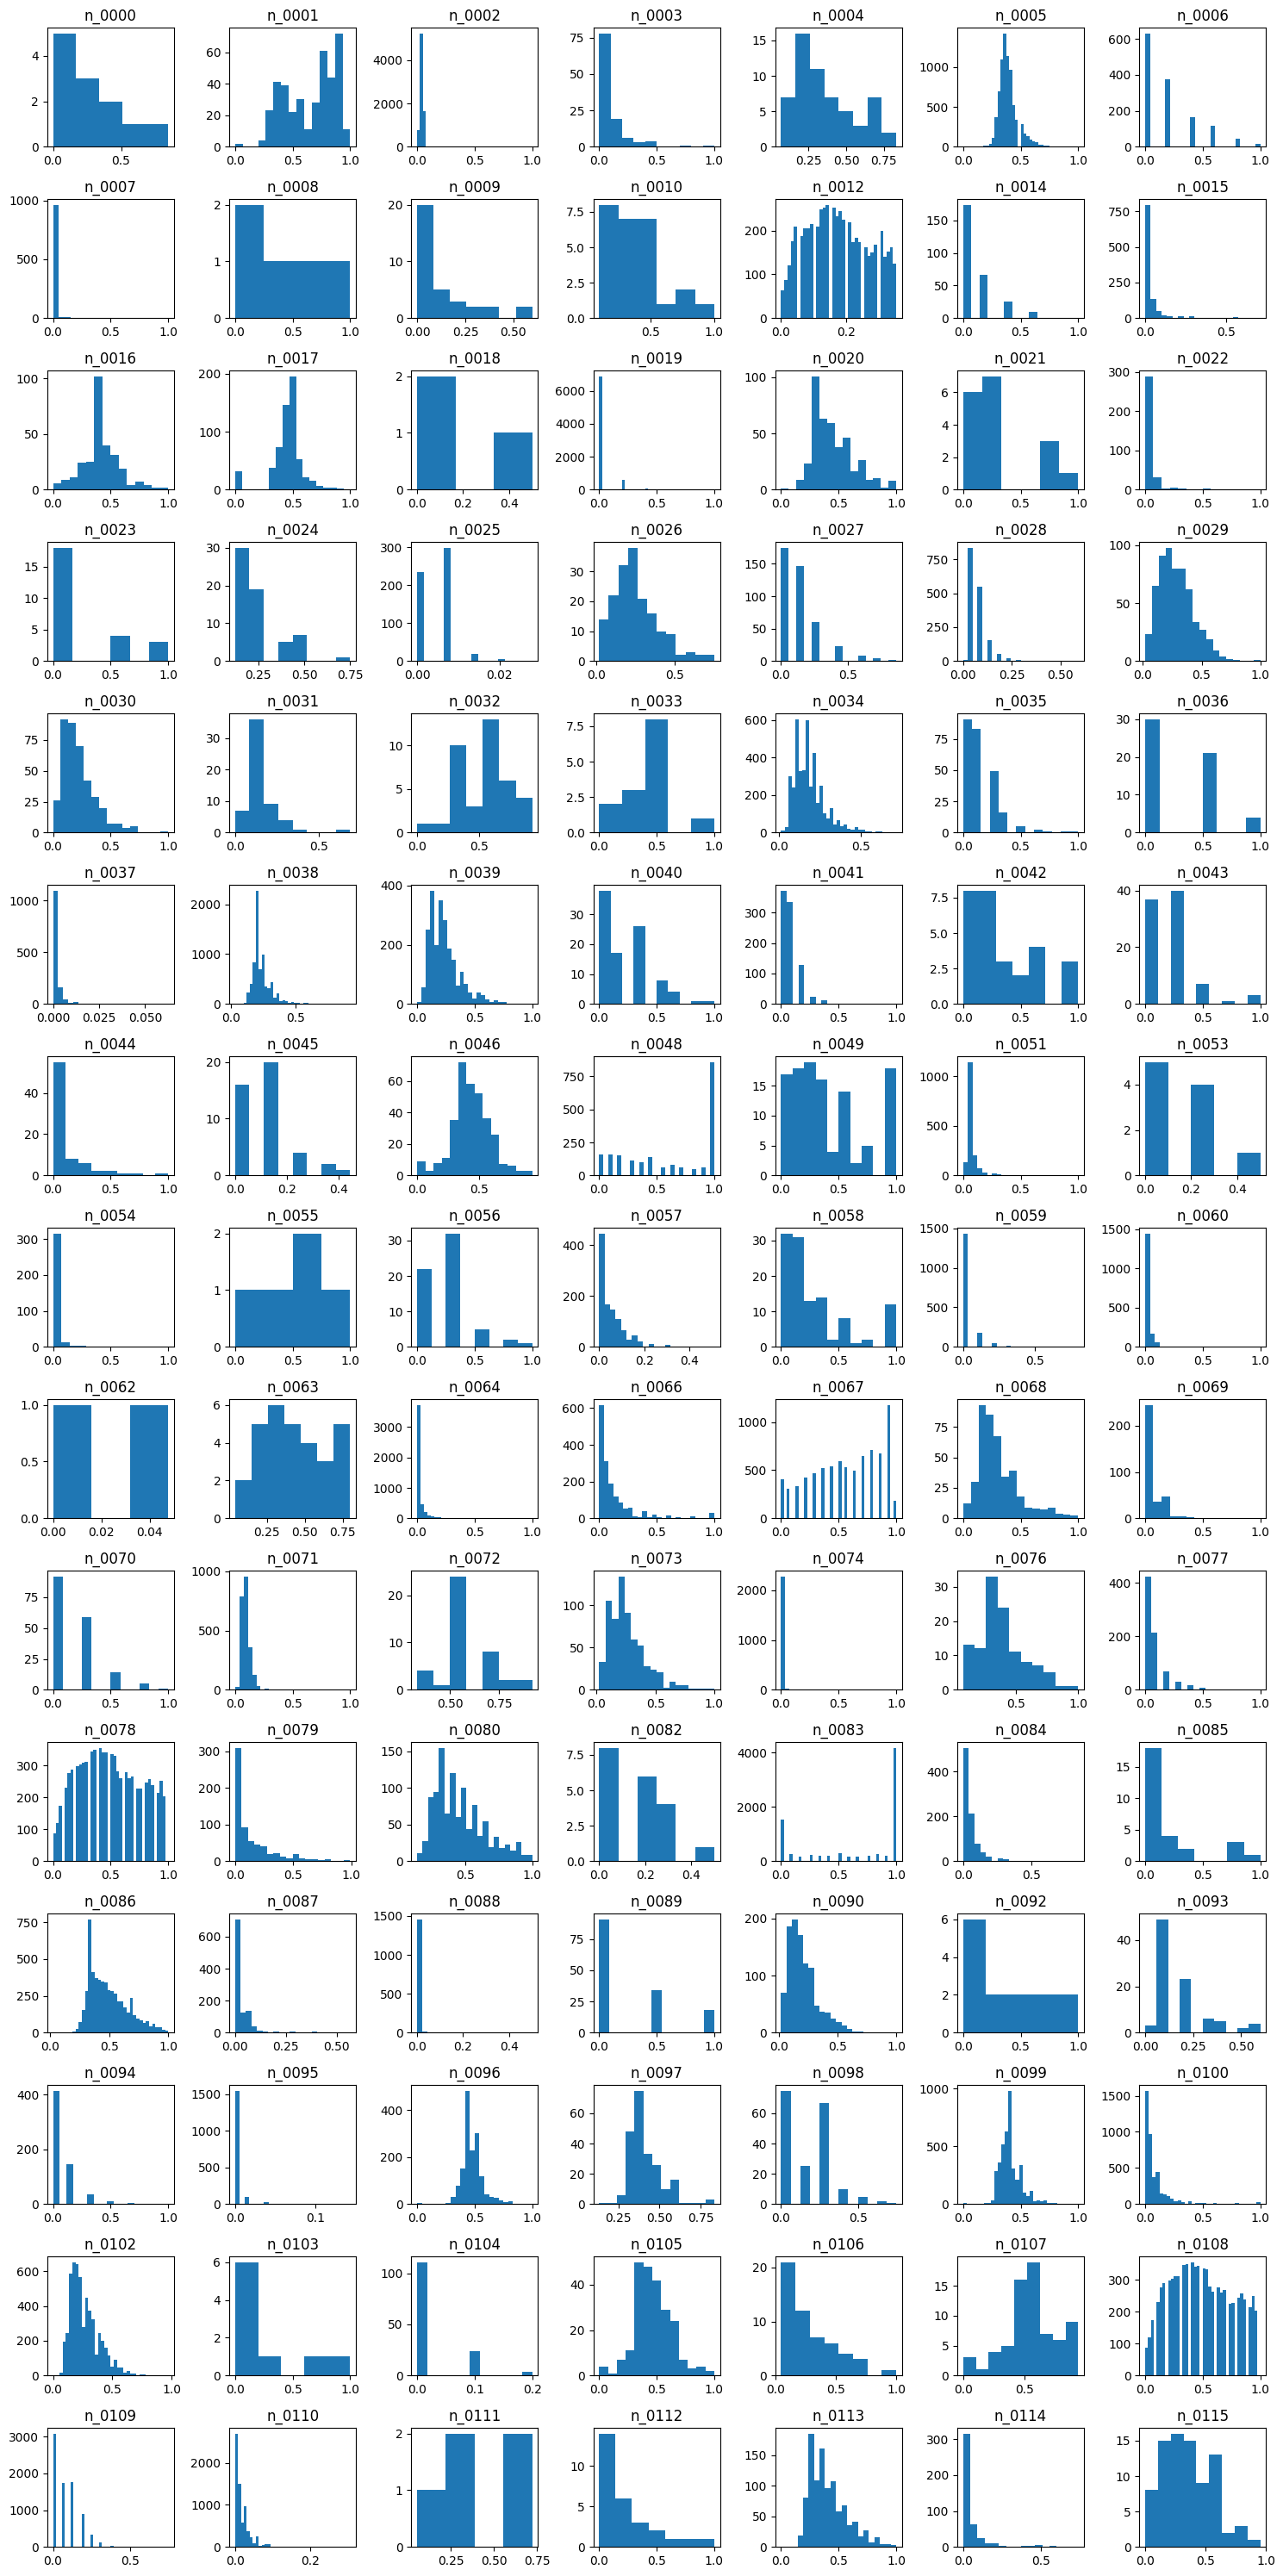

In [13]:
fig, axs = plt.subplots(15, 7, figsize=(15, 30), tight_layout=True) # 15*7=105

for i in range(15):
    for j in range(7):
        axs[i][j].set_title(num_cols[i*7+j])
        axs[i][j].hist(data_df[num_cols[i*7+j]].dropna(), bins='rice')

Нашлась потерянная n_0101 колонка. Как и говорилось ранее, нам это не принципиально.

Беглый взгляд сразу дает понять, что колонки n_0108 и n_0078 очень сильно скореллированы, это может помешать в линейной регресии (в нашем случае в логистической, но на фундаментальном уровне это один и тот же тип модели), если мы не применим регуляризацию. Найдем все такие совпадения путем построения матрицы скореллированности признаков. (Если у пары значений для конкретной строки хотя бы в одной из них будет Nan, мы его отбросим. Впрочем, pandas делает это по умолчанию)

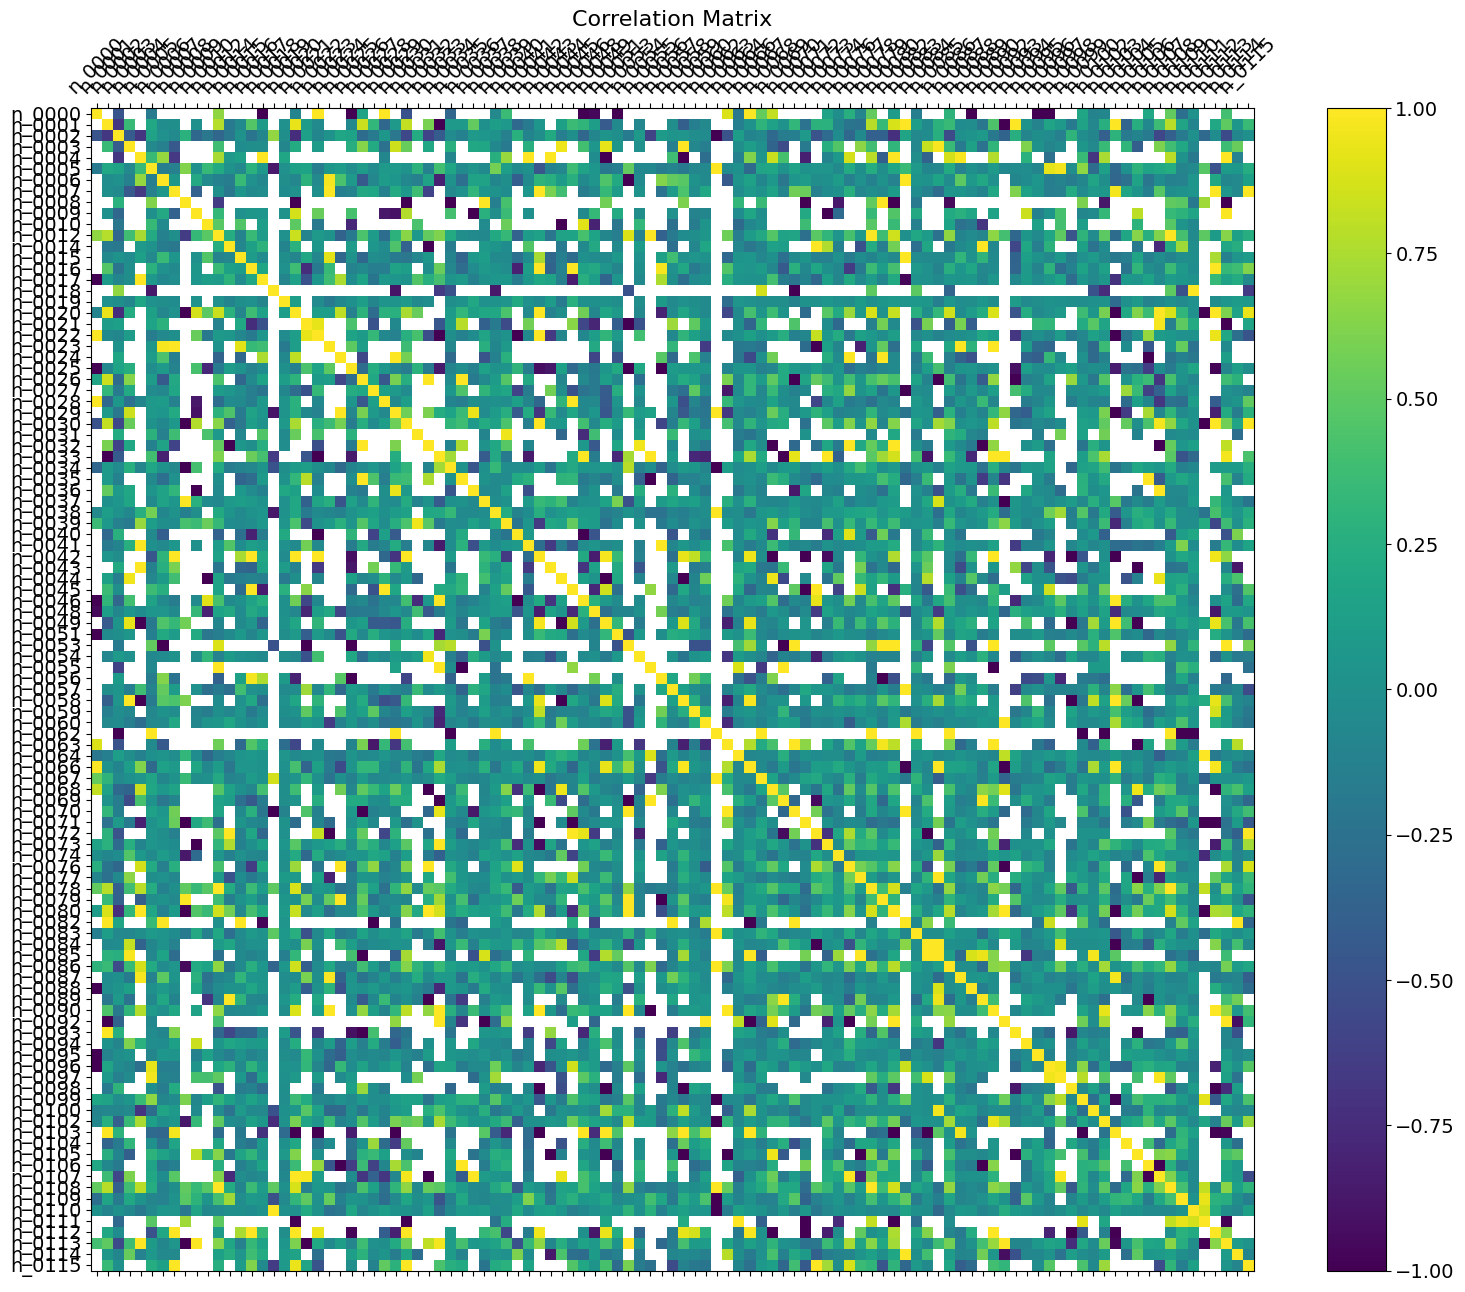

In [14]:
f = plt.figure(figsize=(19, 15))
num_corr = data_df[num_cols].corr()
plt.matshow(num_corr, fignum=f.number)
plt.xticks(range(data_df[num_cols].select_dtypes(['number']).shape[1]), data_df[num_cols].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_df[num_cols].select_dtypes(['number']).shape[1]), data_df[num_cols].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


Как мы видим, в целом не очень много сильно скоррелированных признаков. Но дубликаты это плохо: как минимум, часть моделей плохо работает со скоррелированными признаками, как максимум - упадет интерпретируемость любой модели. Однако высокие значения коэффициента корреляции, вычисленные через .corr(), это необходимое, но не достаточное условие: 2 стобца могут иметь 2 попарно одинаковых не NaN значения, при этом иметь заполненные остальные клетки (например, у первого столбца с 0 по 500, у второго с 499 по 1000). Тогда коэфициент корреляции будет высоким, при этом никакого смысла отбрасывать одну из колонок не будет, так только потеряем и так немногочисленные данные. Вместо этого надо вручную посмотреть почему получается такой высокий коэфициент в каждом случае, благо количество таких случаев это позволяет, и отбросить истинно скоррелированные.

Получим пары скоррелированных колонок (без учета диагональных элементов)

In [15]:
mask = np.where(np.eye(len(num_cols)) == 1, False, True)

num_corr_pairs = np.argwhere(num_corr.where(cond=mask, other=pd.NA).to_numpy() > 0.75)
print(num_corr_pairs.shape)

sorted_arr = np.sort(num_corr_pairs, axis=1)
_, unique_indices = np.unique(sorted_arr, axis=0, return_index=True)
unique_pairs = num_corr_pairs[unique_indices]

unique_pairs.shape

(418, 2)


(209, 2)

Подсчитаем долю удвоенных не NaN пар по отношению к общему количеству не NaN значений в столбцах-парах

In [16]:
notna_ratio = np.array([])
for pair in unique_pairs:
    column1_name, column2_name = num_cols[pair[0]], num_cols[pair[1]]
    sub_df = data_df[[column1_name, column2_name]]
    notna_pairs_count = 2*sub_df.notna().all(axis=1).sum()
    notna_column1_count, notna_column1_count = data_df[column1_name].notna().sum(), data_df[column2_name].notna().sum()
    
    notna_ratio = np.append(notna_ratio, notna_pairs_count/(notna_column1_count+notna_column1_count))

Построим гистограмму распределения значений

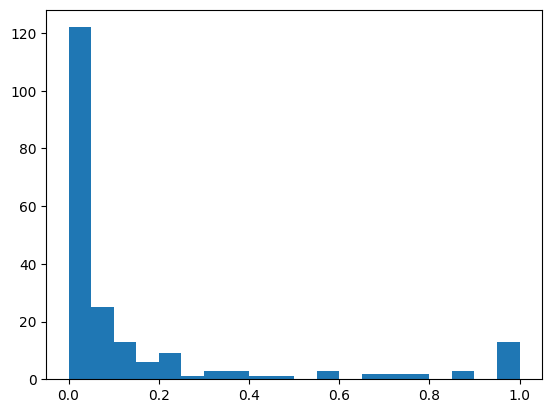

In [17]:
plt.hist(notna_ratio, bins=20);

Создадим массив, где будем накапливать колонки, не несущие никакой информации.

In [18]:
zero_information_cols = []

Отберем из этих пар колонок те пары, где процент использованных значений для подсчета коэффициента корреляции по отношению к общему числу обоих не Nan ячеек больше 0.8

In [19]:
true_num_corr_pairs_indices = np.argwhere(notna_ratio > 0.8)
print(true_num_corr_pairs_indices.shape)
true_num_corr_pairs = unique_pairs[true_num_corr_pairs_indices]
true_num_corr_pairs

(16, 1)


array([[[  5,  56]],

       [[  5,  86]],

       [[  5,  87]],

       [[ 27,  56]],

       [[ 32,  48]],

       [[ 35,  76]],

       [[ 36,  56]],

       [[ 40, 101]],

       [[ 46,  53]],

       [[ 46, 101]],

       [[ 53, 101]],

       [[ 70,  72]],

       [[ 70,  97]],

       [[ 70, 100]],

       [[ 97, 100]],

       [[ 98, 100]]], dtype=int64)

Всего 16 таких пар, посмотрим на их гистограммы 

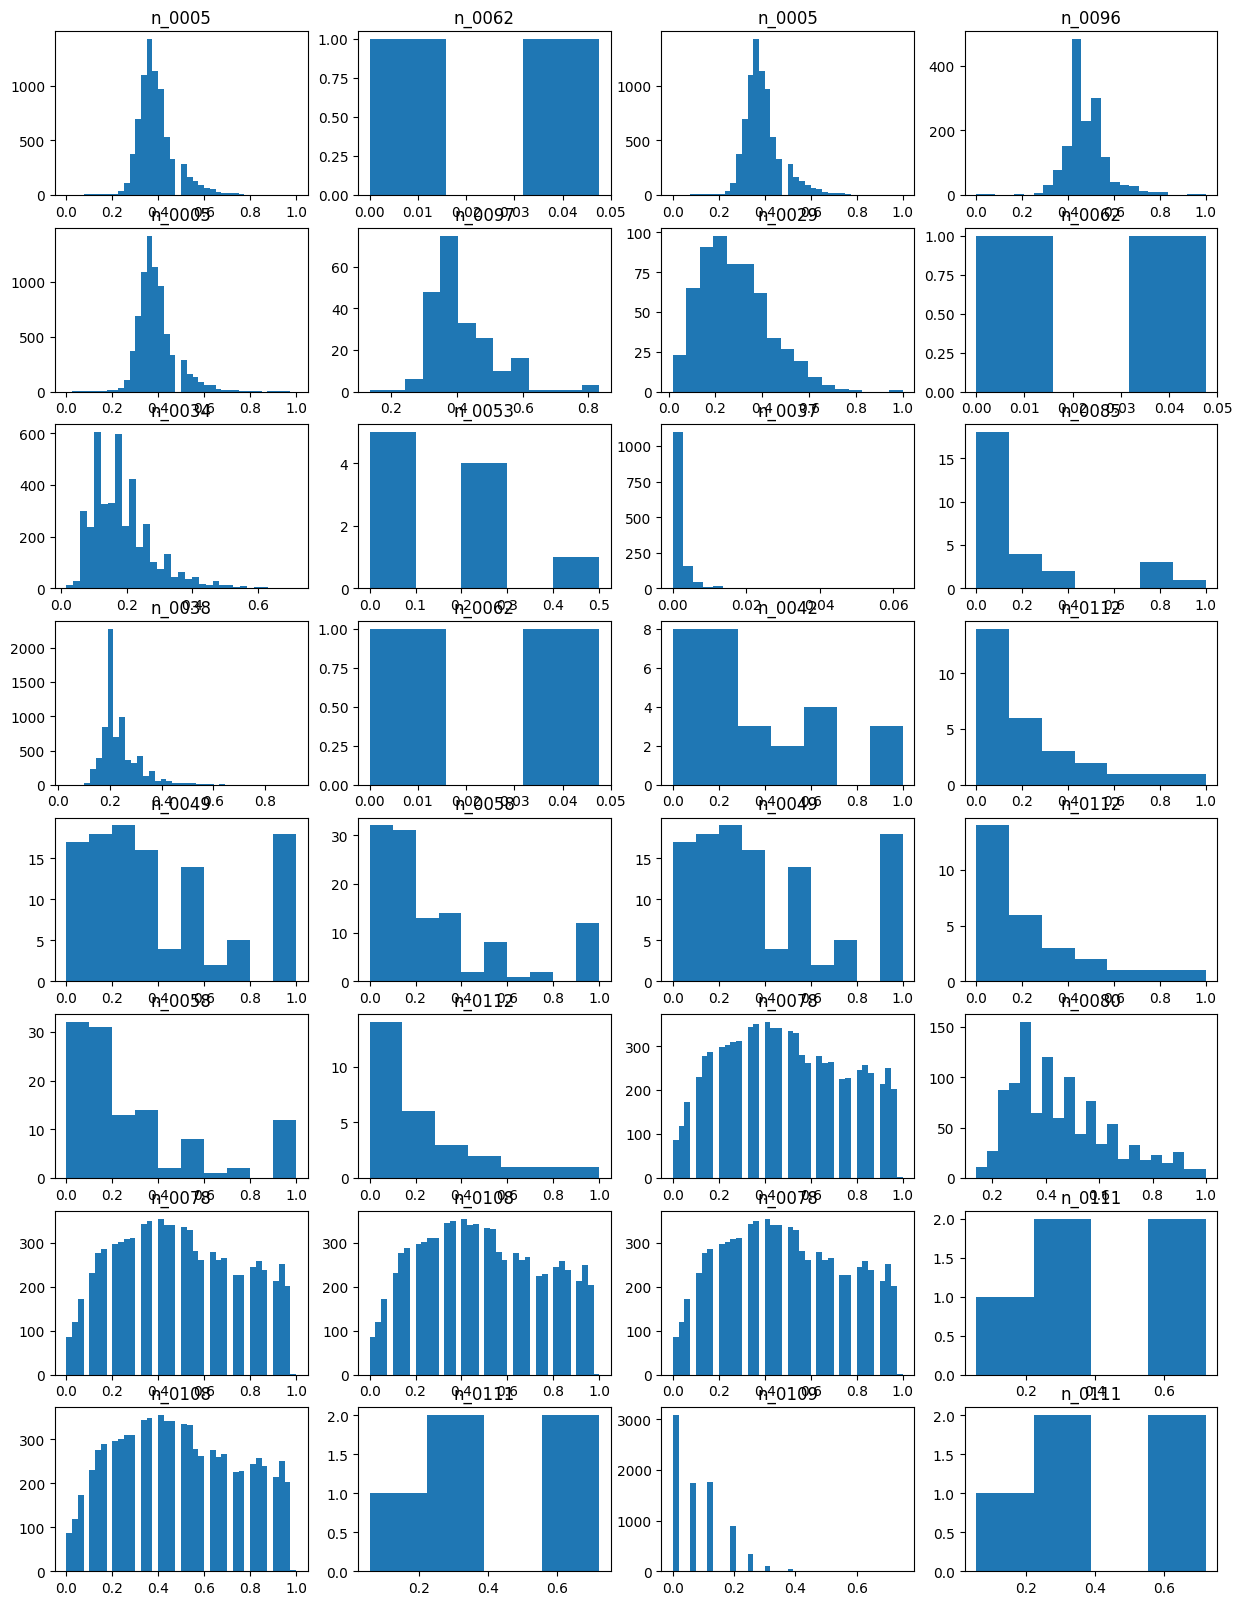

In [20]:
fig, axs = plt.subplots(true_num_corr_pairs_indices.shape[0]//2, 4, figsize = (15, 20))

for i, pair in enumerate(true_num_corr_pairs):
    axs[i//2][0+2*(i%2)].hist(data_df[num_cols[pair[0][0]]].dropna(), bins='rice')
    axs[i//2][0+2*(i%2)].set_title(num_cols[pair[0][0]])

    axs[i//2][1+2*(i%2)].hist(data_df[num_cols[pair[0][1]]].dropna(), bins='rice')
    axs[i//2][1+2*(i%2)].set_title(num_cols[pair[0][1]])


Видно, что пара колонок (78, 108) имеют практически идентичные данные. Одну из них можно смело выкинуть.

In [21]:
zero_information_cols.append('n_0078')

### Признаки с типом данных int

Посмотрим, какие колонки попали в список int колонок

In [22]:
int_cols

['n_0011',
 'n_0013',
 'n_0047',
 'n_0050',
 'n_0052',
 'n_0061',
 'n_0065',
 'n_0075',
 'n_0081',
 'n_0091',
 'n_0101',
 'o_0116',
 'o_0117',
 'o_0118',
 'o_0119',
 'o_0120',
 'o_0121',
 'o_0122',
 'o_0123',
 'o_0124',
 'o_0125',
 'o_0126',
 'o_0127',
 'o_0128',
 'o_0129',
 'o_0130',
 'o_0131',
 'o_0132',
 'o_0133',
 'o_0134',
 'o_0135',
 'o_0136',
 'o_0137',
 'o_0138',
 'o_0139',
 'o_0140',
 'o_0141',
 'o_0142',
 'o_0143',
 'o_0144',
 'o_0145',
 'o_0146',
 'o_0147',
 'o_0148',
 'o_0149',
 'o_0150',
 'o_0151',
 'o_0152',
 'o_0153',
 'o_0154',
 'o_0155',
 'o_0156',
 'o_0157',
 'o_0158',
 'o_0159',
 'o_0160',
 'o_0161',
 'o_0162',
 'o_0163',
 'o_0164',
 'o_0165',
 'o_0166',
 'o_0167',
 'o_0168',
 'o_0169',
 'o_0170',
 'o_0171',
 'o_0172',
 'o_0173',
 'o_0174',
 'o_0175',
 'o_0176',
 'o_0177',
 'o_0178',
 'o_0179',
 'o_0180',
 'o_0181',
 'o_0182',
 'o_0183',
 'o_0184',
 'o_0185',
 'o_0186',
 'o_0187',
 'o_0188',
 'o_0189',
 'o_0190',
 'o_0191',
 'o_0192',
 'o_0193',
 'o_0194',
 'o_0195',

Видно, что попала часть из n_\*, и c_\*. Посмотрим, что лежит в таких колонках.

In [23]:
n_cols, o_cols, c_cols, unsorted = [], [], [], []
for col_name in int_cols:
    if col_name[0] == 'n':
        n_cols.append(col_name)
    elif col_name[0] == 'o':
        o_cols.append(col_name)
    elif col_name[0] == 'c':
        c_cols.append(col_name)
    else:
        unsorted.append(col_name)

len(n_cols), len(o_cols), len(c_cols), len(unsorted)

(11, 211, 26, 0)

In [24]:
for col_name in n_cols:
    print(data_df[col_name].value_counts())

1    2
Name: n_0011, dtype: Int64
0    93
1    56
Name: n_0013, dtype: Int64
1    8000
Name: n_0047, dtype: Int64
1    8000
Name: n_0050, dtype: Int64
1    8000
Name: n_0052, dtype: Int64
1    8000
Name: n_0061, dtype: Int64
0    1
Name: n_0065, dtype: Int64
1    8000
Name: n_0075, dtype: Int64
0    3
1    1
Name: n_0081, dtype: Int64
1    8000
Name: n_0091, dtype: Int64
Series([], Name: n_0101, dtype: Int64)


В n_0011 две 1, в n_0013 93 нуля и 56 единиц, в n_0047, n_0050, n_0052, n_0061, n_0075, n_0091 - все значения равны единице. В n_0065 один 0, в n_0081 три 0 и одна 1, в n_0101 нет значений.

Из этих колонок имеет смысл оставить только n_0013, остальные не несут никакой информации.

In [25]:
zero_information_cols.extend(['n_0047', 'n_0050', 'n_0052', 'n_0061', 'n_0075', 'n_0091', 'n_0101'])

In [26]:
for col_name in c_cols:
    print(data_df[col_name].value_counts())

Series([], Name: c_0491, dtype: Int64)
Series([], Name: c_0529, dtype: Int64)
Series([], Name: c_0541, dtype: Int64)
Series([], Name: c_0596, dtype: Int64)
Series([], Name: c_0632, dtype: Int64)
Series([], Name: c_0644, dtype: Int64)
Series([], Name: c_0693, dtype: Int64)
Series([], Name: c_0708, dtype: Int64)
Series([], Name: c_0710, dtype: Int64)
Series([], Name: c_0763, dtype: Int64)
Series([], Name: c_0784, dtype: Int64)
Series([], Name: c_0803, dtype: Int64)
Series([], Name: c_0848, dtype: Int64)
Series([], Name: c_0902, dtype: Int64)
Series([], Name: c_0959, dtype: Int64)
Series([], Name: c_1009, dtype: Int64)
Series([], Name: c_1072, dtype: Int64)
Series([], Name: c_1129, dtype: Int64)
Series([], Name: c_1148, dtype: Int64)
Series([], Name: c_1168, dtype: Int64)
Series([], Name: c_1230, dtype: Int64)
Series([], Name: c_1257, dtype: Int64)
Series([], Name: c_1277, dtype: Int64)
Series([], Name: c_1281, dtype: Int64)
Series([], Name: c_1308, dtype: Int64)
Series([], Name: c_1332, 

In [27]:
zero_information_cols.extend(c_cols)

Во всех категориальных колонках, попавших в int, все значения пустые. Нас такие колонки так же не интересуют, потому что не несут никакой информации.

Со знанием, что пустые колонки могут попасть в колонки, начинающиеся с o, найдем так же все пустые колонки, названия которых начинаются с o

In [28]:
o_cols_count = {}
o_cols_count_count = {}
for col_name in o_cols:
    count = data_df[col_name].value_counts().sum()
    if count in o_cols_count:
        o_cols_count[count].append(col_name)
        o_cols_count_count[count] += 1
    else:
        o_cols_count[count] = [col_name]
        o_cols_count_count[count] = 1
    
o_cols_count = dict(sorted(o_cols_count.items()))
o_cols_count_count = dict(sorted(o_cols_count_count.items()))
o_cols_count_count

{0: 3,
 1: 31,
 2: 4,
 3: 1,
 4: 9,
 5: 1,
 6: 5,
 7: 1,
 8: 2,
 9: 3,
 12: 2,
 13: 1,
 18: 1,
 19: 2,
 20: 4,
 21: 1,
 26: 1,
 29: 1,
 31: 2,
 32: 2,
 34: 1,
 36: 2,
 38: 1,
 39: 2,
 40: 1,
 43: 2,
 45: 1,
 47: 1,
 48: 1,
 49: 2,
 50: 1,
 52: 1,
 61: 1,
 63: 1,
 64: 3,
 65: 1,
 76: 1,
 93: 1,
 96: 2,
 97: 1,
 102: 1,
 107: 1,
 109: 1,
 115: 1,
 126: 2,
 131: 1,
 145: 1,
 146: 1,
 164: 1,
 176: 1,
 181: 1,
 182: 1,
 188: 1,
 210: 1,
 233: 1,
 246: 1,
 257: 1,
 270: 1,
 272: 1,
 288: 1,
 290: 1,
 322: 1,
 336: 1,
 357: 1,
 363: 1,
 367: 1,
 375: 1,
 376: 2,
 397: 1,
 400: 1,
 406: 1,
 424: 1,
 428: 1,
 452: 1,
 470: 1,
 495: 1,
 499: 1,
 550: 1,
 671: 1,
 689: 2,
 710: 1,
 712: 1,
 743: 1,
 748: 1,
 763: 1,
 765: 1,
 775: 1,
 778: 1,
 781: 1,
 848: 1,
 857: 1,
 916: 1,
 938: 1,
 996: 1,
 1050: 1,
 1071: 1,
 1326: 1,
 1383: 1,
 1436: 1,
 1448: 1,
 1452: 1,
 1453: 1,
 1504: 1,
 1513: 1,
 1534: 1,
 1551: 1,
 1597: 1,
 1615: 1,
 1693: 1,
 1694: 3,
 1695: 2,
 1702: 1,
 1778: 1,
 1892: 1,
 20

Здесь в o_cols_count лежит ссылка на словарь вида {количество не NaN элементов : массив названий колонок}

В o_cols_count_count лежит ссылка на словарь вида {количество не NaN элементов : количество таких колонок}

Те колонки, где лежит менее 10 элементов можно смело принять несущественными (и паразитными), но отбрасывать их или нет - часть исследования, пока мы эту информацию просто держим в голове. (Но колонки где 0 значений мы абсолютно точно удаляем)

In [29]:
zero_information_cols.extend(o_cols_count[0])

Посмотрим так же на 2 колонки с 8000 элементами. Вполне может оказаться так, что там все значения одинаковые.

In [30]:
print(data_df[o_cols_count[8000][0]].value_counts())
print(data_df[o_cols_count[8000][1]].value_counts())

369    825
329    161
149    124
352    117
239     85
      ... 
198      1
138      1
356      1
168      1
304      1
Name: o_0176, Length: 363, dtype: Int64
4     2142
5     1772
7     1328
0      673
6      647
8      435
2      423
1      372
3       93
10      69
9       46
Name: o_0264, dtype: Int64


Тут все хорошо, теперь можно перейти к категориальным признакам

### Категориальные признаки

Здесь уже больше тысячи признаков, поэтому отдельно смотреть графики не будем. Обратимся к статистическим методам: посмотрим распределение количества уникальных значений (заодно выкинем единичные), построим корреляционную матрицу методом Крамера V

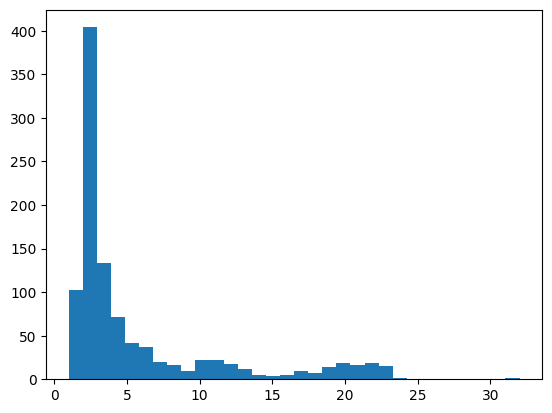

In [31]:
cat_counts = data_df[cat_cols].nunique()
plt.hist(cat_counts, bins=max(cat_counts));

Посмотрим, возможно есть заполненные колонки с одной колонкой

In [32]:
one_value_cols = cat_counts[cat_counts == 1].index
full_values = []
for col in cat_cols:
    if data_df[col].value_counts().sum() == data_df.shape[0]:
        full_values.append(col)

full_one_value_cols = list(set(one_value_cols).intersection(set(full_values)))
len(full_one_value_cols)

0

Таких нет

Построим корреляционную матрицу для категориальных признаков. Обычная формула Пирсона слабо отражает действительность. поэтому воспользуемся критерием V Крамера.

Приведем формулу: (Дополнительно вычислим p-value для проверки статистической значимости)

In [33]:
import scipy.stats as ss

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum()
    shp = confusion_matrix.shape
    min_dim = min(confusion_matrix.shape)-1
    v_cramer = np.sqrt((chi2/n) / min_dim)

    p_value = 1 - ss.chi2.cdf(chi2, shp[0]*shp[1])

    return v_cramer, p_value

С помощью формулы выше построим матрицу корреляции. (7.5 секунд на 1000 подсчетов => час на подсчет)

In [34]:
# corr_cat_matrix = [[pd.NA]*len(cat_cols) for _ in range(len(cat_cols))]
# p_value_corr_cat_matrix = [[pd.NA]*len(cat_cols) for _ in range(len(cat_cols))]
# for i in range(len(cat_cols)):
#     print(i)
#     for j in range(i+1, len(cat_cols)):
#         conf_matrix = pd.crosstab(data_df[cat_cols[i]], data_df[cat_cols[j]])
#         try:
#             corr_cat_matrix[i][j] = cramers_v(conf_matrix)
#         except Exception:
#             pass
#         corr_cat_matrix[i][j] = corr_cat_matrix[j][i]

### Таргеты

Посмотрим на распределение таргетов.

In [35]:
label_columns=labels_df.columns
label_columns.shape

(14,)

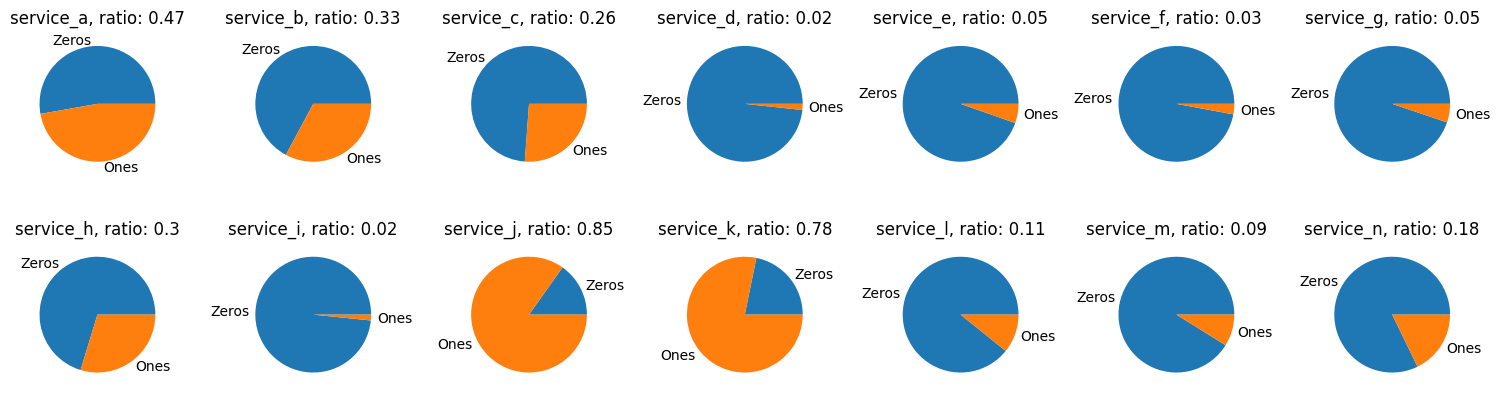

In [36]:
fig, axs = plt.subplots(2, 7, figsize=(15, 5), tight_layout=True)

for i in range(2):
    for j in range(7):
        column = labels_df[label_columns[i*7+j]]
        labels = 'Zeros', 'Ones'
        count = [column.value_counts()[0], column.value_counts()[1]]
        axs[i][j].set_title(f"{label_columns[i*7+j]}, ratio: {round(column.value_counts()[1]/column.value_counts().sum(), 2)}")
        axs[i][j].pie(count, labels=labels)

Больше чем в половине тагретов случаев наблюдается сильнейший дисбаланс классов. В целом, вычисляемой метрике это никак не вредит. 

### Обработка данных -- резюме

В первую очередь уберем неинформативные признаки (0 значений / все значения одинаковые)

In [37]:
print(data_df.shape)
data_df = data_df.drop(zero_information_cols, axis=1)
data_df.shape

(8000, 1378)


(8000, 1341)

Получим названия новых колонок без удаленных

In [38]:
cat_cols = data_df.select_dtypes(include=['string']).columns.tolist()
num_cols = data_df.select_dtypes(include=['Float64']).columns.tolist()
int_cols = data_df.select_dtypes(include=['Int64']).columns.tolist()

len(num_cols), len(int_cols), len(cat_cols)

(104, 212, 1025)

Обозначим идеи по отсеиванию признаков:
1) Убрать признаки менее чем с 1000 значений
2) Убрать признаки с низкой дисперсией
3) Убрать признаки с коэф. корреляции выше 0.75
4) Убрать признаки, отсеянные логистической регрессией с L1 регуляризацией (позднее)

1.

In [39]:
data_1000 = data_df.dropna(thresh=1000, axis=1)
f'{data_df.shape} --> {data_1000.shape}'

'(8000, 1341) --> (8000, 397)'

2.

In [40]:
from sklearn.feature_selection import VarianceThreshold

numerical_cols = data_df[num_cols+int_cols]
categorical_cols = data_df[cat_cols]

selector = VarianceThreshold(threshold=0.2)
pd.DataFrame(selector.fit_transform(numerical_cols))

selected_indices = selector.get_support(indices=True)
selected_cols = data_df.columns[selected_indices]


data_var = data_df[cat_cols+list(selected_cols)]
f'{data_df.shape} --> {data_var.shape}'

'(8000, 1341) --> (8000, 1198)'

3. Тут все не так просто. Из 2 сильно скоррелированных признаков удалять стоит только один из них, не оба. Однако, когда много сильно скоррелированных признаков, задача резко становится NP-полной, причем перебор с поиском оптимального (наименьшего) количества признаков для удаления занимает (n k) времени, а удаление признаков сильно неоптимально. Реализуем оптимизацию на основе алгоритма Брона-Кербоша.

In [41]:
import networkx as nx

def get_noncollinear_fts(corr_matrix, trsh=0.8, random_seed=42):
    fts = corr_matrix.columns
    corr_matrix = np.array(corr_matrix.copy())
    # Fill diagonal elements by 2. That value is greater than trashold
    np.fill_diagonal(corr_matrix, 2)
    corr_matrix = pd.DataFrame(corr_matrix, columns=fts, index=fts)
    graph_matrix = corr_matrix[abs(corr_matrix) > trsh]
    # High-correlated vertices does not connect by edge
    graph_matrix[~graph_matrix.isna()] = 0
    # Other vertices connect by edges
    graph_matrix.fillna(1, inplace=True)
    G = nx.from_numpy_array(np.array(graph_matrix))
    G = nx.relabel_nodes(G, dict(zip(list(G.nodes), fts)))

    # 4. Qliques search
    clq = nx.find_cliques(G)
    cliques = list(clq)

    return cliques, G

In [42]:
#better_num_cols = get_noncollinear_fts(num_corr, trsh=0.8, random_seed=42)

На матрице ~100x100 алгоритм выполняется 25 минут. Для осуществления подобного на матрице корреляции категориальных признаков ~1000x1000 уйдет примерно в 100 раз больше времени, что слишком долго, к тому же начинает подводить оперативная память. Придется обойтись простым удалением признаков по одному, пока значения в оставшейся матрице корреляции нас не начнут устраивать.

In [43]:
...

Ellipsis

# Часть с машинным обучением или вроде того

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, log_loss, classification_report, multilabel_confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

Как говорилось ранее, мы имеем дело с данными с огромным количеством пропусков и по большей части это является основной проблемой поставленной задачи. В целом бороться с пропущенными значениями можно тремя способами:
1) Использование моделей, допускающих пропущенные значения (деревья и ансамбли на их основе)
2) Удалить признаки с отсутствующими значениями
3) Заполнение пропусков: в случае маленького количества пропусков в числовых признаков это может быть несмещенная оценка - среднее/мода/медиана, или другой алгоритм, обученный заполнять их на основе других признаков.

В начале работы над любой задачей машинного обучения необхоходимо обозначить baseline. В нашем случае это будет логистическая регрессия. Пропуски float данных заполним средним, пропуски int данных заполним медианой, пропуски str даных заменим отдельным str значением 'NaN'

Создадим функцию, вычисляющую интересующую
 нас метрику (логлосс для каждой модели отдельно и среднее всех моделей)

In [45]:
def avglogloss(y_pred_proba, y_true):
    loglosses = np.array([])
    for ind, col_name in enumerate(label_columns):
        loglosses = np.append(loglosses, log_loss(y_true[col_name], y_pred_proba[:, ind]))
    return loglosses, loglosses.mean()

## Baseline

Обозначим Baseline: будем предсказывать 0.5 для каждого случая

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_df, labels_df, test_size=0.2, random_state=42)

y_test_pred_proba = y_test.copy()
y_test_pred_proba[:] = 0.5
y_test_pred_proba = np.array(y_test_pred_proba)

print('naive: \n', avglogloss(y_test_pred_proba, y_test))

C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\1656762503.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  y_test_pred_proba[:] = 0.5


naive: 
 (array([0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718]), 0.6931471805599453)


0.69 -- Baseline.

## LogReg

Заменим пропущенные значения числовых признаков на среднее, int признаков на медиану, а категориальных на строку 'NaN', что будет просто новым значением. (Подготовим функцию, выполняющую это)

In [47]:
# def get_cols(data):
#     new_cat_cols = data.select_dtypes(include=['string']).columns.tolist()
#     new_num_cols = data.select_dtypes(include=['Float64']).columns.tolist()
#     new_int_cols = data.select_dtypes(include=['Int64']).columns.tolist()
#     return new_cat_cols, new_num_cols, new_int_cols 

# def prepare_data_for_logreg(data):
#     new_cat_cols, new_num_cols, new_int_cols = get_cols(data)

#     data[new_num_cols] = data[new_num_cols].fillna(data[new_num_cols].mean())
#     data[new_cat_cols] = data[new_cat_cols].fillna('NaN')
#     data[new_int_cols] = data[new_int_cols].fillna(data[new_int_cols].median().astype(int))

#     return data

In [48]:
# raw_data_logreg = prepare_data_for_logreg(data_df)
# data_1000_logreg = prepare_data_for_logreg(data_1000)
# data_var_logreg = prepare_data_for_logreg(data_var)

Подготовим пайплайн обработки данных.

In [49]:
class Prepare4LogReg(BaseEstimator, TransformerMixin):
    def __init__(self, data, transform_cat=True):
        self.categorical_columns = data.select_dtypes(include=['string']).columns.tolist()
        self.integer_columns = data.select_dtypes(include=['Int64']).columns.tolist()
        self.numeric_columns = data.select_dtypes(include=['Float64']).columns.tolist()
        self.label_encoders = {}
        self.imputer_median = SimpleImputer(strategy='median')
        self.imputer_mean = SimpleImputer(strategy='mean')
        self.standard_scaler = StandardScaler()
        self.transform_cat = transform_cat

    def fit(self, X):
        if len(self.categorical_columns) != 0:
            for column in self.categorical_columns:
                X[column] = X[column].fillna('NaN')
                if self.transform_cat:
                    self.label_encoders[column] = LabelEncoder()
                    self.label_encoders[column].fit(X[column])
        if len(self.integer_columns) != 0:
            self.imputer_median.fit(X[self.integer_columns])
        if len(self.numeric_columns) != 0:
            self.imputer_mean.fit(X[self.numeric_columns])
        
        return self

    def transform(self, X, standard=True):
        X_transformed = X.copy()

        # Обработка категориальных колонок
        if len(self.categorical_columns) != 0:
            for column in self.categorical_columns:
                X_transformed[column] = X_transformed[column].fillna('NaN')
                if self.transform_cat:
                    X_transformed[column] = self.label_encoders[column].transform(X_transformed[column])
        
        # Обработка целочисленных данных
        if len(self.integer_columns) != 0:
            X_transformed[self.integer_columns] = self.imputer_median.transform(X_transformed[self.integer_columns]).astype(int)

        # Обработка числовых данных
        if len(self.numeric_columns) != 0:
            X_transformed[self.numeric_columns] = self.imputer_mean.transform(X_transformed[self.numeric_columns])

        # Нормировка данных
        if standard:
            if self.transform_cat:
                X_transformed = pd.DataFrame(self.standard_scaler.fit_transform(X_transformed), columns=X_transformed.columns, index=X_transformed.index)
            else:
                non_cat_cols = X_transformed.select_dtypes(include=['Float64', 'Int64']).columns
                X_transformed[non_cat_cols] = pd.DataFrame(self.standard_scaler.fit_transform(X_transformed[non_cat_cols]), index=X_transformed.index)

        return X_transformed

In [50]:
# label_encoder = LabelEncoder()
# encoded_df = data_df.copy()

# for col in new_cat_cols:
#     encoded_col = label_encoder.fit_transform(encoded_df[col])
#     encoded_df[col] = encoded_col

# labels_df = labels_df.astype('int32')

In [51]:
data_raw_processor, data_1000_processor, data_var_processor = Prepare4LogReg(data_df), Prepare4LogReg(data_1000), Prepare4LogReg(data_var)

In [52]:
data_raw_prep = data_raw_processor.fit_transform(data_df)
data_1000_prep = data_1000_processor.fit_transform(data_1000)
data_var_prep = data_var_processor.fit_transform(data_var)

C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna('NaN')
C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna('NaN')
C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

У нас 14 таргетов и по сути мы можем каждый из них отдельно предсказывать (обучать 14 моделей)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data_raw_prep, labels_df, test_size=0.2, random_state=42)
logreg_raw = MultiOutputClassifier(LogisticRegression())
logreg_raw.fit(X_train, y_train)
print('logreg12 done')

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1000_prep, labels_df, test_size=0.2, random_state=42)
logreg_1000 = MultiOutputClassifier(LogisticRegression())
logreg_1000.fit(X_train_1, y_train)
print('logreg12 done')

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_var_prep, labels_df, test_size=0.2, random_state=42)
logreg_var = MultiOutputClassifier(LogisticRegression())
logreg_var.fit(X_train_2, y_train)
print('logreg12 done')

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

logreg12 done


c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

logreg12 done


c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

logreg12 done


c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
y_test_pred_proba = np.array(logreg_raw.predict_proba(X_test))[:, :, 1].T
y_train_pred_proba = np.array(logreg_raw.predict_proba(X_train))[:, :, 1].T

print('raw train: \n', avglogloss(y_train_pred_proba, y_train))
print('raw test: \n', avglogloss(y_test_pred_proba, y_test))

y_test_pred_proba = np.array(logreg_1000.predict_proba(X_test_1))[:, :, 1].T
y_train_pred_proba = np.array(logreg_1000.predict_proba(X_train_1))[:, :, 1].T

print('1000 train: \n', avglogloss(y_train_pred_proba, y_train))
print('1000 test: \n', avglogloss(y_test_pred_proba, y_test))

y_test_pred_proba = np.array(logreg_var.predict_proba(X_test_2))[:, :, 1].T
y_train_pred_proba = np.array(logreg_var.predict_proba(X_train_2))[:, :, 1].T

print('var train: \n', avglogloss(y_train_pred_proba, y_train))
print('var test: \n', avglogloss(y_test_pred_proba, y_test))

raw train: 
 (array([0.28236155, 0.40380587, 0.38458292, 0.00060116, 0.05798362,
       0.0030747 , 0.06724089, 0.32847976, 0.00349579, 0.25397662,
       0.34049822, 0.0181522 , 0.00920804, 0.22723059]), 0.17004942320915178)
raw test: 
 (array([0.67323472, 0.86877047, 0.84255549, 0.07241825, 0.57253479,
       0.22863173, 0.60515245, 0.80498407, 0.17661032, 0.75087293,
       0.74917074, 0.36719835, 0.33061091, 0.70626327]), 0.553500606524801)
1000 train: 
 (array([0.36078737, 0.47930445, 0.46640232, 0.00392311, 0.1289207 ,
       0.01785034, 0.13082974, 0.40751115, 0.0160048 , 0.33206982,
       0.41613322, 0.06513001, 0.03758111, 0.30108131]), 0.2259663897056769)
1000 test: 
 (array([0.40974631, 0.56329926, 0.56127733, 0.07388709, 0.23325336,
       0.21034823, 0.22798919, 0.51526119, 0.15337089, 0.42494797,
       0.51279925, 0.17796786, 0.18653141, 0.36747294]), 0.3298680211384709)
var train: 
 (array([0.29490506, 0.4176979 , 0.40087483, 0.00070834, 0.07045197,
       0.00398424, 

In [55]:
logregL1 = MultiOutputClassifier(LogisticRegression(penalty='l1', solver='liblinear'))
logregL1.fit(X_train, y_train)
print('logreg1 fitted')

logregL2 = MultiOutputClassifier(LogisticRegression(penalty='l2', solver='liblinear'))
logregL2.fit(X_train, y_train)
print('logreg2 fitted')

logreg1 fitted
logreg2 fitted


In [56]:
y_test_pred_proba = np.array(logregL1.predict_proba(X_test))[:, :, 1].T
y_train_pred_proba = np.array(logregL1.predict_proba(X_train))[:, :, 1].T

print('l1 train: \n', avglogloss(y_train_pred_proba, y_train))
print('l1 test: \n', avglogloss(y_test_pred_proba, y_test))

y_test_pred_proba = np.array(logregL2.predict_proba(X_test))[:, :, 1].T
y_train_pred_proba = np.array(logregL2.predict_proba(X_train))[:, :, 1].T

print('l2 train: \n', avglogloss(y_train_pred_proba, y_train))
print('l2 test: \n', avglogloss(y_test_pred_proba, y_test))

l1 train: 
 (array([0.28505955, 0.40560284, 0.38557424, 0.0029586 , 0.06882862,
       0.00812087, 0.07823902, 0.33075433, 0.00922175, 0.25746881,
       0.34234227, 0.02901587, 0.01561978, 0.22922493]), 0.17485939150531124)
l1 test: 
 (array([0.58451425, 0.80466464, 0.73264005, 0.06558286, 0.35307498,
       0.17528468, 0.39330371, 0.71390456, 0.12174818, 0.63899741,
       0.68064989, 0.2103361 , 0.22906984, 0.57051951]), 0.44816361829261403)
l2 train: 
 (array([0.2804069 , 0.40182294, 0.38115118, 0.00287701, 0.06057189,
       0.00705894, 0.06960524, 0.32664564, 0.00752065, 0.25177344,
       0.33808779, 0.02304433, 0.01429946, 0.22500418]), 0.17070497060277384)
l2 test: 
 (array([0.6958124 , 0.90131903, 0.85795087, 0.16092579, 0.5866184 ,
       0.33641755, 0.61798901, 0.83051995, 0.2581819 , 0.75965047,
       0.7774719 , 0.37131321, 0.37496276, 0.7066503 ]), 0.5882702534837522)


In [57]:
logregL1L2raw = MultiOutputClassifier(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5))
logregL1L2raw.fit(X_train, y_train)
print('logreg12 done')

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1000_prep, labels_df, test_size=0.2, random_state=42)
logregL1L21000 = MultiOutputClassifier(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5))
logregL1L21000.fit(X_train_1, y_train)
print('logreg12 done')

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_var_prep, labels_df, test_size=0.2, random_state=42)
logregL1L2var = MultiOutputClassifier(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5))
logregL1L2var.fit(X_train_2, y_train)
print('logreg12 done')

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

logreg12 done


c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

logreg12 done


c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

logreg12 done


c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [58]:
y_test_pred_proba = np.array(logregL1L2raw.predict_proba(X_test))[:, :, 1].T
y_train_pred_proba = np.array(logregL1L2raw.predict_proba(X_train))[:, :, 1].T

print('L1l2 train: \n', avglogloss(y_train_pred_proba, y_train))
print('L1l2 test: \n', avglogloss(y_test_pred_proba, y_test))

y_test_pred_proba = np.array(logregL1L21000.predict_proba(X_test_1))[:, :, 1].T
y_train_pred_proba = np.array(logregL1L21000.predict_proba(X_train_1))[:, :, 1].T

print('L1l2 train: \n', avglogloss(y_train_pred_proba, y_train))
print('L1l2 test: \n', avglogloss(y_test_pred_proba, y_test))

y_test_pred_proba = np.array(logregL1L2var.predict_proba(X_test_2))[:, :, 1].T
y_train_pred_proba = np.array(logregL1L2var.predict_proba(X_train_2))[:, :, 1].T

print('L1l2 train: \n', avglogloss(y_train_pred_proba, y_train))
print('L1l2 test: \n', avglogloss(y_test_pred_proba, y_test))

L1l2 train: 
 (array([0.3554558 , 0.45955803, 0.45279895, 0.11609919, 0.18627576,
       0.1357233 , 0.19522819, 0.39713137, 0.1268833 , 0.33707754,
       0.40971975, 0.15579979, 0.15512447, 0.31680344]), 0.2714056339318713)
L1l2 test: 
 (array([0.41425902, 0.5680466 , 0.56690649, 0.18169436, 0.27335303,
       0.21799577, 0.27631125, 0.53192457, 0.19057289, 0.42092631,
       0.48838988, 0.22294449, 0.22743542, 0.41772887]), 0.35703492535298514)
L1l2 train: 
 (array([0.36358189, 0.48086771, 0.46849743, 0.02630449, 0.13737143,
       0.04802294, 0.13865543, 0.40910438, 0.04048173, 0.33459087,
       0.41823143, 0.07977372, 0.06368748, 0.30384347]), 0.23664388616480178)
L1l2 test: 
 (array([0.39745307, 0.5516508 , 0.54645977, 0.0416221 , 0.19780548,
       0.08504418, 0.19761909, 0.50954793, 0.07341894, 0.39520299,
       0.48537476, 0.11974616, 0.11095257, 0.35769229]), 0.2906850102122855)
L1l2 train: 
 (array([0.36255818, 0.46799265, 0.46046743, 0.11668668, 0.18901942,
       0.13765

Лучшее тестовое значенеи метрики при удалении признаков с менее чем 1000 значений и L1+L2 регуляризацией. Посмотрим на распределение весов в L1+L2 регуляризации. L2 помогает справиться с мультиколлениарностью, L1 помогает отобрать веса: она склонна занулять те, которые вносят малый вклад, это будет новый способ отбора признаков.

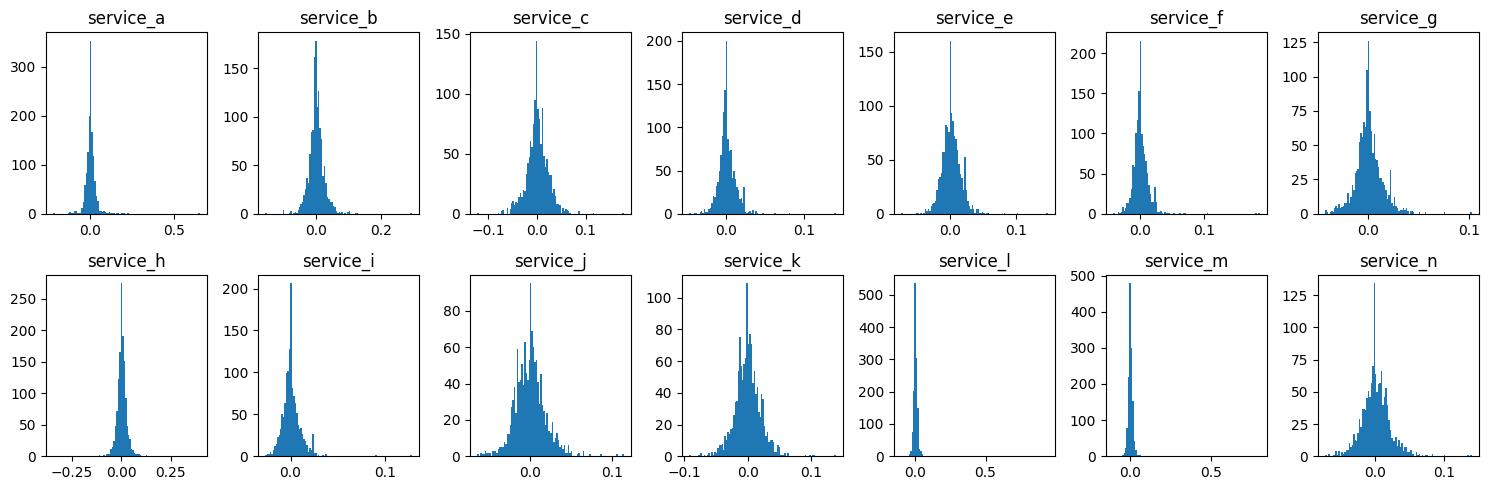

In [59]:
fig, axs = plt.subplots(2, 7, figsize=(15, 5), tight_layout=True)

for i in range(2):
    for j in range(7):
        column = labels_df[label_columns[i*7+j]]
        axs[i][j].set_title(label_columns[i*7+j])
        axs[i][j].hist(logregL1L2raw.estimators_[i*7+j].coef_[0], bins=100)

Выбросим неважные признаки (Отедельно для каждого тагрета!)

In [60]:
from sklearn.feature_selection import SelectFromModel

selectors = []
all_new_features = []
for model in logregL1L2raw.estimators_:
    selector = SelectFromModel(model, prefit=True)
    selectors.append(selector)

    new_features = selector.fit(X_train, y_train)
    new_features_indeces = selector.get_support(indices=True)
    all_new_features.append(data_raw_prep.columns[new_features_indeces])
    

all_new_features = [np.array(subarray) for subarray in all_new_features]
for features in all_new_features:
    print(len(features))

441
484
514
493
524
494
501
472
504
536
520
479
468
534


Для каждого признака, их число сократилось в 3 раза. В целом, это что-то среднее между радикальным выкидыванием всех признаков с менее чем 1000 значениями и мелкими удалениями признаков с самым высоким коэффициентом корреляции

Посмотрим заново на последние распределения.

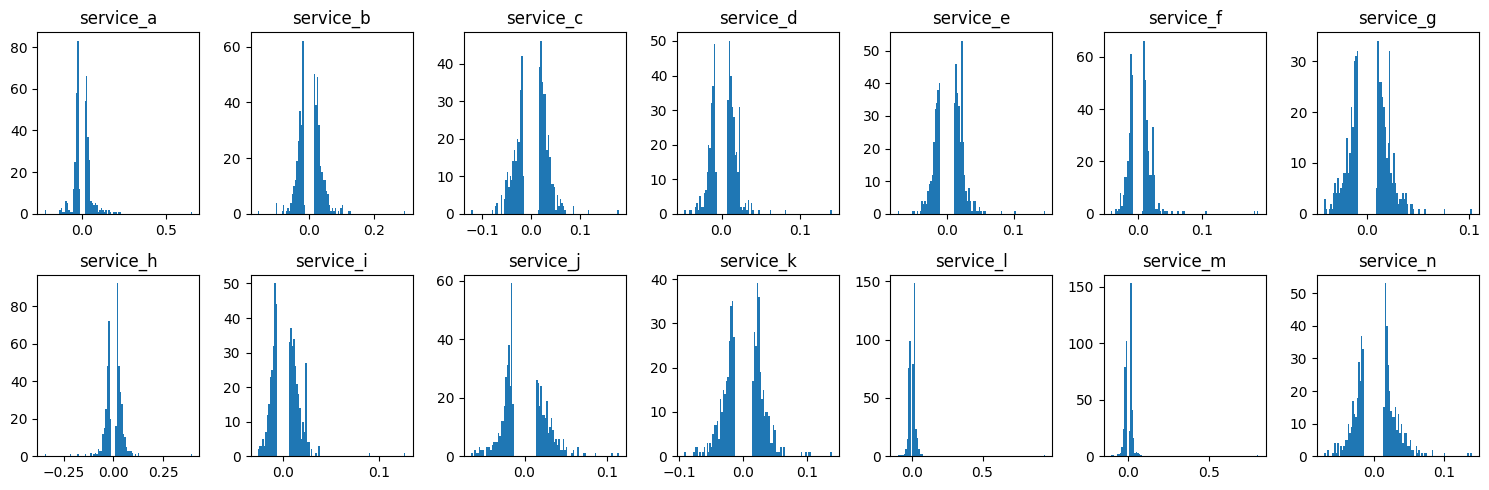

In [61]:
fig, axs = plt.subplots(2, 7, figsize=(15, 5), tight_layout=True)

for i in range(2):
    for j in range(7):
        cols_ids = [data_raw_prep.columns.get_loc(col) for col in all_new_features[i*7+j]]
        column = labels_df[label_columns[i*7+j]]
        axs[i][j].set_title(label_columns[i*7+j])
        axs[i][j].hist(logregL1L2raw.estimators_[i*7+j].coef_[0][cols_ids], bins=100)

Пора переходить к более мощным моделям.

## НЕ baseline: Градиентный бустинг

Существует 3 (4) библиотеки с реализованными градиентными бустингами, вот они слева направо:

1. Catboost
2. LightGBM
3. XGBoost
4. Реализация scikit-learn

Исторически они довольно сильно отличались, но за последнее время переняли все хорошие идеи друг у друга, поэтому остановимся только на одном -- Catboost (Нет, не из-за русского языка в документации)

In [62]:
import catboost
from catboost import CatBoostClassifier
from catboost import Pool

К сожалению, построить хороший градиентный бустинг в условиях датасета ~1300x8000 очень дорого (после 50 итераций estimate time было 1.5 дня), поэтому выберем среди реализаций из коробки ту версию, которая при достижении заданной точности будет иметь наименьшее переобучение и продолжим ее учить. Под версиями имеется ввиду обучение на одном из 4 посчитанных датасетов.

Единственный нюанс заключается в том, что набор признаков, выбранных L1 LogReg отличается для каждого таргета, а из коробки catboost c таким работать не умеет. Поэтому мы обучим 14 кэтбустов и точно так же посчитаем метрику для них.



In [63]:
data_raw_processor_no_cat, data_1000_processor_no_cat, data_var_processor_no_cat = Prepare4LogReg(data_df, transform_cat=False), Prepare4LogReg(data_1000, transform_cat=False), Prepare4LogReg(data_var, transform_cat=False)

data_raw_no_cat_prep = data_raw_processor_no_cat.fit_transform(data_df)
data_1000_no_cat_prep = data_1000_processor_no_cat.fit_transform(data_1000)
data_var_no_cat_prep = data_var_processor_no_cat.fit_transform(data_var)

data_L1_processors_no_cat = []
all_data_L1_no_cat_prep = []
for i in range(14):
    data_L1_processor_no_cat = Prepare4LogReg(data_df[all_new_features[i]], transform_cat=False)
    data_L1_processors_no_cat.append(data_L1_processor_no_cat)
    data_L1_no_cat_prep = data_L1_processor_no_cat.fit_transform(data_df[all_new_features[i]])
    all_data_L1_no_cat_prep.append(data_L1_no_cat_prep)

C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna('NaN')
C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna('NaN')
C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [64]:
# cat_raw = CatBoostClassifier(cat_features=data_raw_no_cat_prep.select_dtypes(include=['string']).columns.tolist(), iterations=50, loss_function='MultiLogloss')
# cat_1000 = CatBoostClassifier(cat_features=data_1000_no_cat_prep.select_dtypes(include=['string']).columns.tolist(), iterations=50, loss_function='MultiLogloss')
# cat_var = CatBoostClassifier(cat_features=data_var_no_cat_prep.select_dtypes(include=['string']).columns.tolist(), iterations=50, loss_function='MultiLogloss')
# cats_L1 = []
# for i in range(14):
#     cat = CatBoostClassifier(cat_features=data_L1_no_cat_prep.select_dtypes(include=['string']).columns.tolist(), iterations=50, loss_function='Logloss')
#     cats_L1.append(cat)

In [65]:
def cat_fit_pipeline(data, labels, simple=True):
    if simple:
        cat_classifier = CatBoostClassifier(cat_features=data.select_dtypes(include=['string']).columns.tolist(), iterations=100, loss_function='MultiLogloss')
        X_train, X_validation, y_train, y_validation = train_test_split(data, labels, test_size=0.2, random_state=42)
        train_pool = Pool(X_train, label=y_train, feature_names=data.columns.tolist(), cat_features=data.select_dtypes(include=['string']).columns.tolist())
        validate_pool = Pool(X_validation, label=y_validation, feature_names=data.columns.tolist(), cat_features=data.select_dtypes(include=['string']).columns.tolist()) 
        cat_classifier.fit(train_pool, eval_set=validate_pool)
        return cat_classifier
    else:
        cats_L1 = []
        for i in range(14):
            cat_classifier = CatBoostClassifier(cat_features=data[i].select_dtypes(include=['string']).columns.tolist(), iterations=100, loss_function='Logloss')
            X_train, X_validation, y_train, y_validation = train_test_split(data[i], labels[labels.columns[i]], test_size=0.2, random_state=42)
            train_pool = Pool(X_train, label=y_train, feature_names=data[i].columns.tolist(), cat_features=data[i].select_dtypes(include=['string']).columns.tolist())
            validate_pool = Pool(X_validation, label=y_validation, feature_names=data[i].columns.tolist(), cat_features=data[i].select_dtypes(include=['string']).columns.tolist()) 
            cat_classifier.fit(train_pool, eval_set=validate_pool)
            cats_L1.append(cat_classifier)
        return cats_L1

In [66]:
cat_raw = cat_fit_pipeline(data_raw_no_cat_prep, labels_df)
cat_raw.save_model('cat_raw')

cat_1000 = cat_fit_pipeline(data_1000_no_cat_prep, labels_df)
cat_raw.save_model('cat_1000')

cat_var = cat_fit_pipeline(data_var_no_cat_prep, labels_df)
cat_raw.save_model('cat_var')

cats_L1 = cat_fit_pipeline(all_data_L1_no_cat_prep, labels_df, simple=False)
for i, model in enumerate(cats_L1):
    model.save_model(f'cat_L1_{i}')

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.136469
0:	learn: 0.5891937	test: 0.5897809	best: 0.5897809 (0)	total: 14.7s	remaining: 24m 16s
1:	learn: 0.5205780	test: 0.5217146	best: 0.5217146 (1)	total: 29.5s	remaining: 24m 6s
2:	learn: 0.4450891	test: 0.4473216	best: 0.4473216 (2)	total: 44.7s	remaining: 24m 6s
3:	learn: 0.4031048	test: 0.4061243	best: 0.4061243 (3)	total: 59.6s	remaining: 23m 51s
4:	learn: 0.3698665	test: 0.3728845	best: 0.3728845 (4)	total: 1m 9s	remaining: 21m 51s
5:	learn: 0.3513231	test: 0.3543139	best: 0.3543139 (5)	total: 1m 24s	remaining: 21m 59s
6:	learn: 0.3340793	test: 0.3375967	best: 0.3375967 (6)	total: 1m 39s	remaining: 22m 1s
7:	learn: 0.3219625	test: 0.3260339	best: 0.3260339 (7)	total: 1m 55s	remaining: 22m 4s
8:	learn: 0.3127813	test: 0.3174692	best: 0.3174692 (8)	total: 2m 10s	remaining: 21m 58s
9:	learn: 0.3055194	test: 0.3112153	best: 0.3112153 (9)	total: 2m 25s	remaining: 21m 51s
10:	learn: 0.3000400	test: 0.3064169	best: 0.3064169 (10)	total: 2m 41s	remaining: 21m 43

In [67]:
def calc_metric(model, data, labels):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    y_test_pred_proba = model.predict_proba(X_test)
    y_train_pred_proba =  model.predict_proba(X_train)
    return avglogloss(y_train_pred_proba, y_train), avglogloss(y_test_pred_proba, y_test)

In [68]:
metrics_raw = calc_metric(cat_raw, data_raw_no_cat_prep, labels_df)
#print('train: \n', metrics_raw[0], '\n test: \n', metrics_raw[1])

metrics_1000 = calc_metric(cat_1000, data_1000_no_cat_prep, labels_df)
#print('train: \n', metrics[0], '\n test: \n', metrics[1])

metrics_var = calc_metric(cat_var, data_var_no_cat_prep, labels_df)
#print('train: \n', metrics[0], '\n test: \n', metrics[1])

metrics_L1 = np.empty((14, 2))
for i, model in enumerate(cats_L1):
    X_train, X_test, y_train, y_test = train_test_split(all_data_L1_no_cat_prep[i], labels_df[labels_df.columns[i]], test_size=0.2, random_state=42)
    metrics_L1[i][0] = np.array(log_loss(y_train, model.predict_proba(X_train)))
    metrics_L1[i][1] = np.array(log_loss(y_test, model.predict_proba(X_test)))

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python3

In [69]:
print('raw train:', metrics_raw[0], '\n raw test:', metrics_raw[1], '\n')
print('1000 train:', metrics_1000[0], '\n 1000 test:', metrics_1000[1], '\n')
print('var train:', metrics_var[0], '\n var test:', metrics_var[1], '\n')
print('L1 train:', metrics_L1[:, 0], '\n L1 test:', metrics_L1[:, 1])

raw train: (array([0.3208316 , 0.44940631, 0.4536284 , 0.02082535, 0.13582244,
       0.04199194, 0.13918849, 0.39061261, 0.03213751, 0.33091797,
       0.41898075, 0.07090225, 0.06765698, 0.30038251]), 0.22666322301151612) 
 raw test: (array([0.35161826, 0.48897788, 0.51013213, 0.0314514 , 0.17730608,
       0.06926887, 0.17379287, 0.4686582 , 0.05122484, 0.35384254,
       0.4563175 , 0.0990687 , 0.10791256, 0.3412955 ]), 0.26291909577137423) 

1000 train: (array([0.32336208, 0.44607453, 0.45282592, 0.025203  , 0.13421697,
       0.04401275, 0.13588632, 0.39048815, 0.03096558, 0.32608882,
       0.41413356, 0.06643207, 0.06170495, 0.30180425]), 0.22522849737808073) 
 1000 test: (array([0.34922209, 0.49396912, 0.5127444 , 0.03454004, 0.1794484 ,
       0.07011265, 0.17230586, 0.46868944, 0.04930775, 0.35707164,
       0.45773492, 0.09481723, 0.0991654 , 0.34447895]), 0.26311484752236275) 

var train: (array([0.32133357, 0.44720452, 0.45282579, 0.02041293, 0.12994949,
       0.04271362

Видим, что catboost с L1 не только меньше переобучился, но и выдал наилучший скор. Далее будем обучать только на этом наборе данных.

In [70]:
def cat_fit_pipeline(data, labels, iterations=100):
    cats_L1 = []
    for i in range(14):
        cat_classifier = CatBoostClassifier(cat_features=data[i].select_dtypes(include=['string']).columns.tolist(), iterations=iterations, loss_function='Logloss')
        X_train, X_validation, y_train, y_validation = train_test_split(data[i], labels[labels.columns[i]], test_size=0.2, random_state=42)
        train_pool = Pool(X_train, label=y_train, feature_names=data[i].columns.tolist(), cat_features=data[i].select_dtypes(include=['string']).columns.tolist())
        validate_pool = Pool(X_validation, label=y_validation, feature_names=data[i].columns.tolist(), cat_features=data[i].select_dtypes(include=['string']).columns.tolist()) 
        cat_classifier.fit(train_pool, eval_set=validate_pool)
        cats_L1.append(cat_classifier)
    return cats_L1

In [71]:
cats_L1_v1 = cat_fit_pipeline(all_data_L1_no_cat_prep, labels_df, iterations=500)
for i, model in enumerate(cats_L1_v1):
    model.save_model(f'cat_L1_v1_{i}')

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.067762
0:	learn: 0.6548732	test: 0.6538944	best: 0.6538944 (0)	total: 326ms	remaining: 2m 42s
1:	learn: 0.6204682	test: 0.6181430	best: 0.6181430 (1)	total: 692ms	remaining: 2m 52s
2:	learn: 0.5937262	test: 0.5912431	best: 0.5912431 (2)	total: 995ms	remaining: 2m 44s
3:	learn: 0.5648972	test: 0.5634167	best: 0.5634167 (3)	total: 1.2s	remaining: 2m 29s
4:	learn: 0.5406562	test: 0.5397246	best: 0.5397246 (4)	total: 1.47s	remaining: 2m 25s
5:	learn: 0.5180064	test: 0.5167451	best: 0.5167451 (5)	total: 1.75s	remaining: 2m 24s
6:	learn: 0.4981913	test: 0.4972719	best: 0.4972719 (6)	total: 2.02s	remaining: 2m 22s
7:	learn: 0.4813285	test: 0.4805993	best: 0.4805993 (7)	total: 2.27s	remaining: 2m 19s
8:	learn: 0.4665287	test: 0.4659919	best: 0.4659919 (8)	total: 2.54s	remaining: 2m 18s
9:	learn: 0.4532204	test: 0.4528570	best: 0.4528570 (9)	total: 2.79s	remaining: 2m 16s
10:	learn: 0.4431306	test: 0.4426195	best: 0.4426195 (10)	total: 3.06s	remaining: 2m 16s
11:	learn: 0

In [74]:
metrics_L1_v1 = np.empty((14, 2))
for i, model in enumerate(cats_L1_v1[-14:]):
    X_train, X_test, y_train, y_test = train_test_split(all_data_L1_no_cat_prep[i], labels_df[labels_df.columns[i]], test_size=0.2, random_state=42)
    metrics_L1_v1[i][0] = np.array(log_loss(y_train, model.predict_proba(X_train)))
    metrics_L1_v1[i][1] = np.array(log_loss(y_test, model.predict_proba(X_test)))

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python3

In [75]:
print('L1 train:', metrics_L1_v1[:, 0], metrics_L1_v1[:, 0].mean(), '\n L1 test:', metrics_L1_v1[:, 1], metrics_L1_v1[:, 1].mean())

L1 train: [0.29523334 0.40912602 0.40091883 0.01954717 0.12492971 0.03134514
 0.10829198 0.33425472 0.0358286  0.3250823  0.42354038 0.05098412
 0.0481489  0.25493092] 0.2044401525755528 
 L1 test: [0.3358901  0.48583273 0.50580064 0.02829777 0.17653639 0.05746621
 0.17080609 0.46222865 0.04824503 0.34877715 0.45733501 0.08834932
 0.09455679 0.33681603] 0.25692413713518214


Обратим внимание на то, что сервисы b, c, h, k предсказаны очень плохо по сравнению с baseline, сервисы a, j, n можно предсказать еще лучше

In [87]:
cats_L1_v2 = cat_fit_pipeline(all_data_L1_no_cat_prep, labels_df, iterations=2000)
for i, model in enumerate(cats_L1_v2):
    model.save_model(f'cat_L1_v2_{i}')

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.037076
0:	learn: 0.6716247	test: 0.6710736	best: 0.6710736 (0)	total: 635ms	remaining: 21m 8s
1:	learn: 0.6523184	test: 0.6512513	best: 0.6512513 (1)	total: 920ms	remaining: 15m 19s
2:	learn: 0.6347729	test: 0.6333872	best: 0.6333872 (2)	total: 1.26s	remaining: 14m 2s
3:	learn: 0.6168385	test: 0.6155340	best: 0.6155340 (3)	total: 1.6s	remaining: 13m 19s
4:	learn: 0.6012102	test: 0.5999343	best: 0.5999343 (4)	total: 1.92s	remaining: 12m 44s
5:	learn: 0.5842923	test: 0.5827935	best: 0.5827935 (5)	total: 2.17s	remaining: 12m
6:	learn: 0.5675684	test: 0.5658183	best: 0.5658183 (6)	total: 2.41s	remaining: 11m 25s
7:	learn: 0.5535614	test: 0.5519814	best: 0.5519814 (7)	total: 2.57s	remaining: 10m 39s
8:	learn: 0.5404680	test: 0.5387766	best: 0.5387766 (8)	total: 2.82s	remaining: 10m 23s
9:	learn: 0.5275322	test: 0.5257265	best: 0.5257265 (9)	total: 3.07s	remaining: 10m 10s
10:	learn: 0.5151089	test: 0.5139192	best: 0.5139192 (10)	total: 3.36s	remaining: 10m 8s
11:	lear

KeyboardInterrupt: 

In [ ]:
metrics_L1_v2 = np.empty((14, 2))
for i, model in enumerate(cats_L1_v2):
    X_train, X_test, y_train, y_test = train_test_split(all_data_L1_no_cat_prep[i], labels_df[labels_df.columns[i]], test_size=0.2, random_state=42)
    metrics_L1_v2[i][0] = np.array(log_loss(y_train, model.predict_proba(X_train)))
    metrics_L1_v2[i][1] = np.array(log_loss(y_test, model.predict_proba(X_test)))

c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
c:\Users\mindb\AppData\Local\Programs\Python\Python3

In [ ]:
print('L1 train:', metrics_L1_v2[:, 0], metrics_L1_v2[:, 0].mean(), '\n L1 test:', metrics_L1_v2[:, 1], metrics_L1_v2[:, 1].mean())

L1 train: [0.26313583 0.43620722 0.42177697 0.01377267 0.10771662 0.03529257
 0.14699273 0.34895994 0.02023596 0.3370709  0.4214873  0.04496108
 0.05149534 0.27236774] 0.20867663359445723 
 L1 test: [0.33055752 0.48638582 0.50766267 0.02571016 0.17377961 0.0574243
 0.17338033 0.45984676 0.04840792 0.35014726 0.45516517 0.09165525
 0.09330652 0.33535185] 0.256341509540574


Лучше из градиентного бустинга сложно будет получить, перейдём к нейросетям.

## Not that deep learning

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

Подготовим данные

In [77]:
data_L1_processors = []
all_data_L1_prep = []
for i in range(14):
    data_L1_processor = Prepare4LogReg(data_df[all_new_features[i]])
    data_L1_processors.append(data_L1_processor)
    data_L1_prep = data_L1_processor.fit_transform(data_df[all_new_features[i]])
    all_data_L1_prep.append(data_L1_prep)

C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna('NaN')
C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna('NaN')
C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2887560533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Зададим нашу модель неглубокого обучения

In [78]:
class FNNClassifier(nn.Module):
    def __init__(self, in_features, hidden_size, out_features):
        super(FNNClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features, hidden_size)
        self.fc2 = nn.Linear(hidden_size, out_features)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Подготовим пайплайн обучения

In [79]:
def fit_pipeline(model, data, labels, max_epochs=10, device="cuda" if torch.cuda.is_available() else "cpu"):
    data = data.astype('float32')
    labels = labels.astype('int64')
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    X_train_t = torch.from_numpy(X_train.values)
    X_test_t = torch.from_numpy(X_test.values)
    y_train_t = torch.from_numpy(y_train.values)
    y_test_t = torch.from_numpy(y_test.values)

    train_dataset = TensorDataset(X_train_t, y_train_t)
    val_dataset = TensorDataset(X_test_t, y_test_t)
    train_dataloader = DataLoader(train_dataset, batch_size=128)
    test_dataloader = DataLoader(val_dataset, batch_size=128)
    loaders = {"train": train_dataloader, "test": test_dataloader}
    
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()
    metric = {"train": [], "test": []}
    model = model.to(device)

    for epoch in range(max_epochs):
        for k, dataloader in loaders.items():
            metric_curr = 0
            count = 0
            for x_batch, y_batch in dataloader:
                count += 1
                if k == "train":
                    model.train()
                    optimizer.zero_grad()
                    outp = model(x_batch.to(device))
                    loss = criterion(outp, y_batch.to(device))
                    metric_curr += loss
                    loss.backward()
                    optimizer.step()
                else:
                    model.eval()
                    with torch.no_grad():
                        outp = model(x_batch.to(device))
                        loss = criterion(outp, y_batch.to(device))
                        metric_curr += loss
                
            if k == "train":
                print(f"Epoch: {epoch+1}")
            print(f"Loader: {k}. LogLoss: {metric_curr/count}")
            metric[k].append(np.array((metric_curr/count).detach()))
    
    return model, metric

In [80]:
FNNmodels = [None]*labels_df.shape[1]
metrics = []
for i in range(len(FNNmodels)):
    model = FNNClassifier(all_data_L1_prep[i].shape[1], 10, 2)
    model, curr_metric = fit_pipeline(model, all_data_L1_prep[i], labels_df[labels_df.columns[i]])
    FNNmodels.append(model)
    metrics.append(curr_metric)

Epoch: 1
Loader: train. LogLoss: 0.6139587759971619
Loader: test. LogLoss: 0.523206353187561
Epoch: 2
Loader: train. LogLoss: 0.5108340978622437
Loader: test. LogLoss: 0.4592801332473755
Epoch: 3
Loader: train. LogLoss: 0.4616328775882721
Loader: test. LogLoss: 0.4300779104232788
Epoch: 4
Loader: train. LogLoss: 0.4304264485836029
Loader: test. LogLoss: 0.4159015417098999
Epoch: 5
Loader: train. LogLoss: 0.41732919216156006
Loader: test. LogLoss: 0.40891367197036743
Epoch: 6
Loader: train. LogLoss: 0.3968968987464905
Loader: test. LogLoss: 0.40714624524116516
Epoch: 7
Loader: train. LogLoss: 0.39022231101989746
Loader: test. LogLoss: 0.40468648076057434
Epoch: 8
Loader: train. LogLoss: 0.3855982720851898
Loader: test. LogLoss: 0.4095916152000427
Epoch: 9
Loader: train. LogLoss: 0.38352417945861816
Loader: test. LogLoss: 0.4067687690258026
Epoch: 10
Loader: train. LogLoss: 0.3729405105113983
Loader: test. LogLoss: 0.4058624505996704
Epoch: 1
Loader: train. LogLoss: 0.6158614158630371
Lo

In [81]:
# for i in range(14):
#     axs[i].set_title(label_columns[i])
#     axs[i].plot(metrics[i]['train'])
#     axs[i].plot(metrics[i]['test'])

[array(0.51959324, dtype=float32), array(0.3979532, dtype=float32), array(0.37171796, dtype=float32), array(0.358161, dtype=float32), array(0.34277776, dtype=float32), array(0.33554494, dtype=float32), array(0.32598588, dtype=float32), array(0.31686038, dtype=float32), array(0.30799836, dtype=float32), array(0.30258918, dtype=float32)]


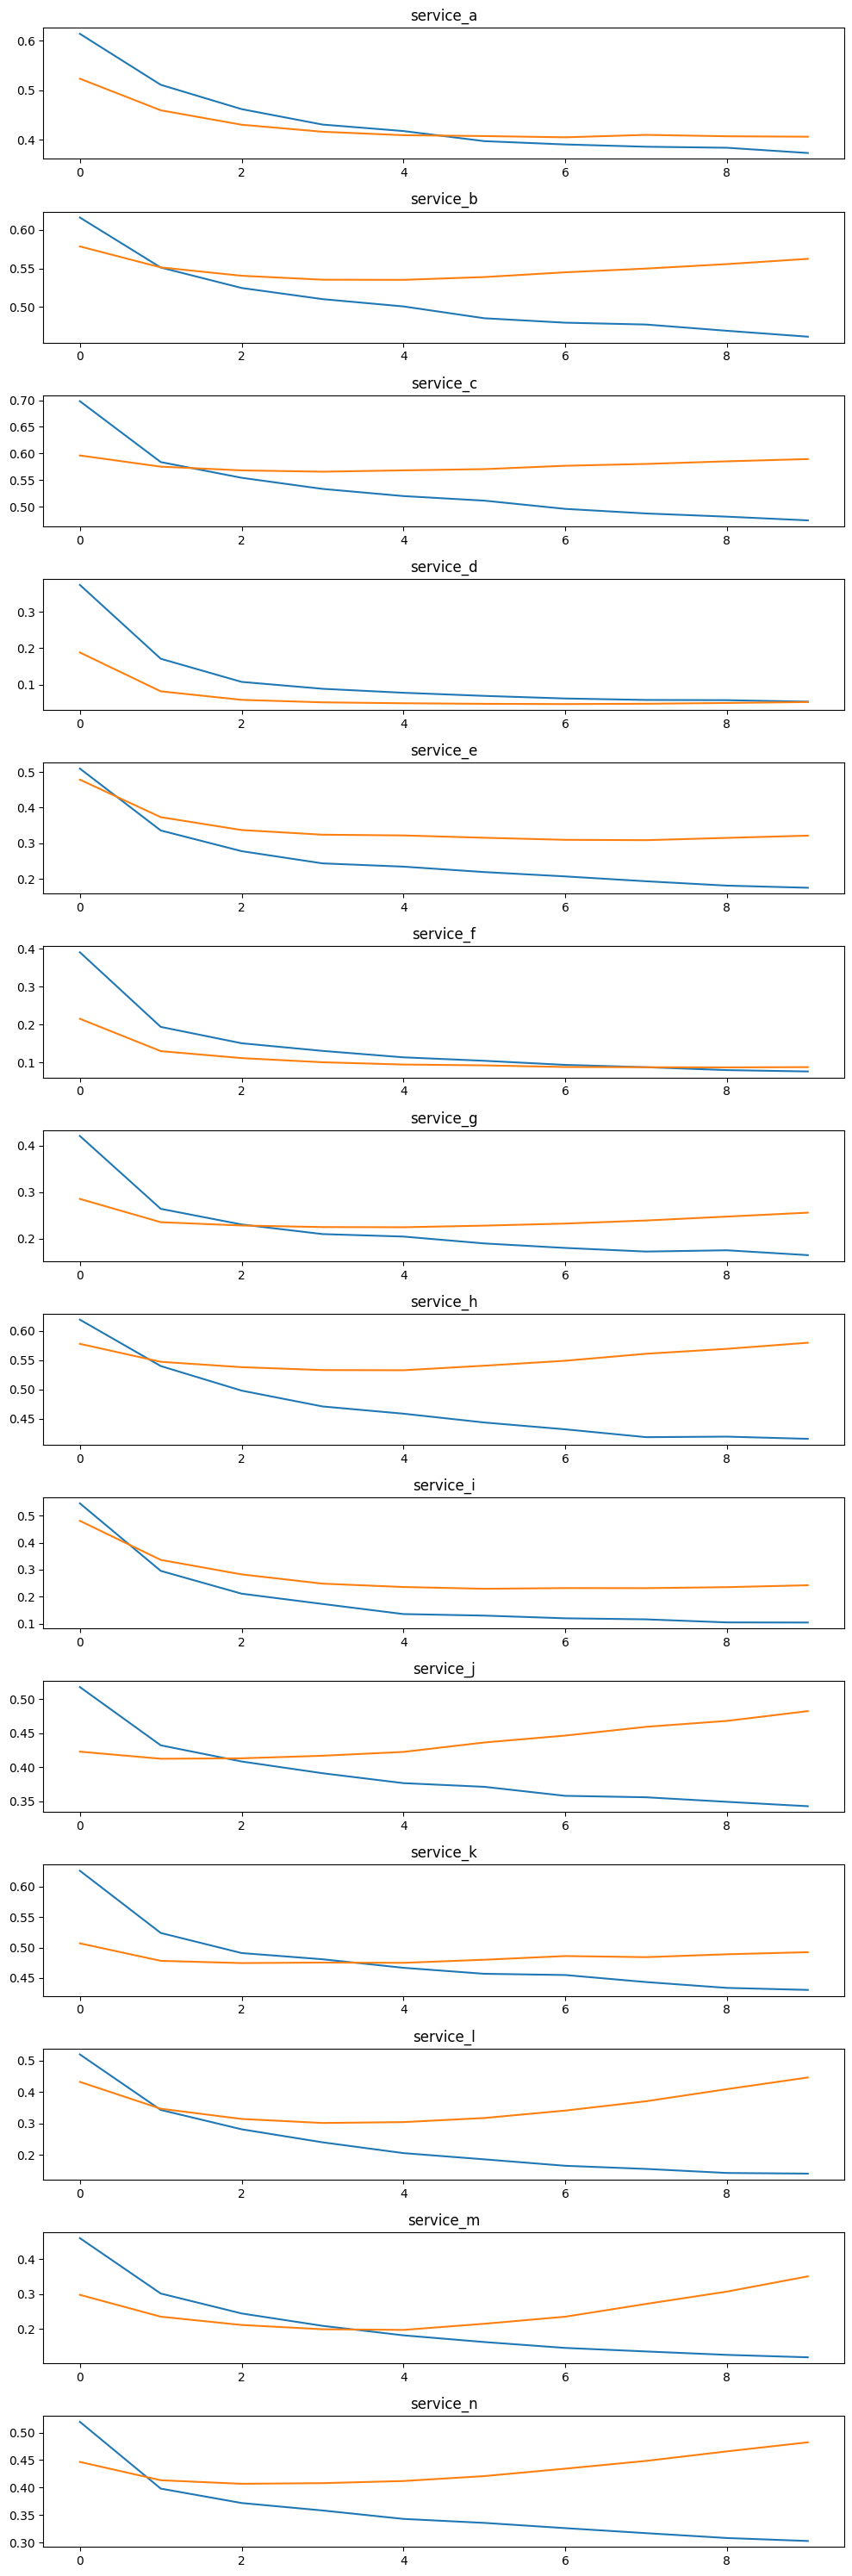

In [82]:
fig, axs = plt.subplots(14, 1, figsize=(10, 30), tight_layout=True)
print(metrics[i]['train'])

for i in range(14):
    axs[i].set_title(label_columns[i])
    axs[i].plot(metrics[i]['train'])
    axs[i].plot(metrics[i]['test'])

Как и ожидалось, даже самая простая сеть просто учит датасет. В среднем обычные нейросети это плохой подход к обычной задаче классификации. Можно еще попробовать случайный лес, но этот алгоритм получает меньший скор по сравнению с градиентным бустингом, что компенсируется его интерпретируемостью. 

Возьмем наше лучшее решение, а именно градиентный бустинг с отобранными фичами с помощью LogReg и получим ответ для задачи.

# Сборка решения

In [83]:
data_test_df = pd.read_csv('./problem_test.csv', sep=',', index_col='id')

C:\Users\mindb\AppData\Local\Temp\ipykernel_26808\2152327821.py:1: DtypeWarning: Columns (329,331,333,336,338,345,346,348,354,355,358,361,362,364,383,390,392,408,416,419,437,442,448,457,464,478,485,489,496,497,498,499,503,510,514,515,519,520,521,523,524,527,530,539,541,544,548,549,551,558,560,572,573,576,579,583,597,602,606,608,609,613,619,620,625,641,645,646,648,655,661,675,682,685,687,690,691,703,713,719,721,733,737,746,749,752,760,768,781,782,807,817,823,824,825,840,843,845,850,861,868,873,879,886,890,897,899,901,902,904,905,908,910,913,917,922,923,939,946,955,968,969,973,977,987,996,1008,1016,1017,1035,1036,1037,1048,1051,1055,1073,1074,1090,1104,1112,1118,1134,1148,1152,1153,1164,1174,1194,1197,1203,1210,1215,1222,1225,1229,1230,1233,1234,1241,1246,1251,1252,1259,1265,1266,1269,1273,1277,1279,1285,1286,1294,1295,1301,1302,1304,1305,1306,1308,1311,1316,1318,1322,1323,1325,1330,1332,1337,1340,1345,1351,1352,1357,1359,1368,1370,1377) have mixed types. Specify dtype option on import o

In [84]:
print(data_test_df.shape)
data_test_df = data_test_df.drop(zero_information_cols, axis=1)
data_test_df.shape

(2000, 1378)


(2000, 1341)

P.S. Для градиентного бустинга, как и для всех алгоритмов использующих деревья, нормировка не нужна, в коде класса Prepare4LogReg есть небольшая неточность. Сам бустинг у меня учился 2.5 часа, поэтому учить заного желания особо нет, с учетом того что нормировка никак не вредит самому алгоритму, только тратит время на само преобразование данных.

In [85]:
test_data = []
for i in range(14):
    test_data_curr = data_L1_processors_no_cat[i].transform(data_test_df[all_new_features[i]])
    test_data.append(test_data_curr)

In [86]:
answer = pd.DataFrame(index=test_data[0].index, columns=labels_df.columns)
for i, model in enumerate(cats_L1_v2):
    answer[answer.columns[i]] = np.argmax(model.predict_proba(test_data[i]), axis=1)

NameError: name 'cats_L1_v2' is not defined

In [ ]:
answer.to_csv('problem_test_labels.csv')